In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('data/train_identity.csv.gz')
df2 = pd.read_csv('data/train_transaction.csv.gz')

In [3]:
# Using TransactionID as index for both data.
df1.set_index('TransactionID',inplace=True)
df2.set_index('TransactionID',inplace=True)

## Looking at the data to check out the values, null value count etc.

In [4]:
df1.head()

id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                              
2987004          0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
2987008         -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2987010         -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
2987011         -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
2987016          0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

               id_09  id_10  ...                id_31 id_32      id_33  \
TransactionID                ...                                         
2987004          NaN    NaN  ...  samsung browser 6.2  32.0  2220x1080   
2987008          NaN    NaN  ...   mobile safari 11.0  32.0   1334x750   
2987010          0.0    0.0  ...          chrome 62.0   NaN        NaN   
2987011          NaN    NaN  ...          chrome 62.0   NaN        NaN   
2987016          0.0    0.0  ...          chrome 62.0  24.0   1280x800   

                        id_34 id_35 id_36  id_37  id_38  DeviceType  \
TransactionID                                                         
2987004        match_status:2     T     F      T      T      mobile   
2987008        match_status:1     T     F      F      T      mobile   
2987010                   NaN     F     F      T      T     desktop   
2987011                   NaN     F     F      T      T     desktop   
2987016        match_status:2     T     F      T      T     desktop   

                                  DeviceInfo  
TransactionID                                 
2987004        SAMSUNG SM-G892A Build/NRD90M  
2987008                           iOS Device  
2987010                              Windows  
2987011                                  NaN  
2987016                                MacOS  

[5 rows x 40 columns]

In [5]:
df1.describe()

id_01          id_02         id_03         id_04  \
count  144233.000000  140872.000000  66324.000000  66324.000000   
mean      -10.170502  174716.584708      0.060189     -0.058938   
std        14.347949  159651.816856      0.598231      0.701015   
min      -100.000000       1.000000    -13.000000    -28.000000   
25%       -10.000000   67992.000000      0.000000      0.000000   
50%        -5.000000  125800.500000      0.000000      0.000000   
75%        -5.000000  228749.000000      0.000000      0.000000   
max         0.000000  999595.000000     10.000000      0.000000   

               id_05          id_06        id_07        id_08         id_09  \
count  136865.000000  136865.000000  5155.000000  5155.000000  74926.000000   
mean        1.615585      -6.698710    13.285354   -38.600388      0.091023   
std         5.249856      16.491104    11.384207    26.084899      0.983842   
min       -72.000000    -100.000000   -46.000000  -100.000000    -36.000000   
25%         0.000000      -6.000000     5.000000   -48.000000      0.000000   
50%         0.000000       0.000000    14.000000   -34.000000      0.000000   
75%         1.000000       0.000000    22.000000   -23.000000      0.000000   
max        52.000000       0.000000    61.000000     0.000000     25.000000   

              id_10  ...          id_17         id_18          id_19  \
count  74926.000000  ...  139369.000000  45113.000000  139318.000000   
mean      -0.301124  ...     189.451377     14.237337     353.128174   
std        2.789446  ...      30.375360      1.561302     141.095343   
min     -100.000000  ...     100.000000     10.000000     100.000000   
25%        0.000000  ...     166.000000     13.000000     266.000000   
50%        0.000000  ...     166.000000     15.000000     341.000000   
75%        0.000000  ...     225.000000     15.000000     427.000000   
max        0.000000  ...     229.000000     29.000000     671.000000   

               id_20        id_21        id_22        id_24        id_25  \
count  139261.000000  5159.000000  5169.000000  4747.000000  5132.000000   
mean      403.882666   368.269820    16.002708    12.800927   329.608924   
std       152.160327   198.847038     6.897665     2.372447    97.461089   
min       100.000000   100.000000    10.000000    11.000000   100.000000   
25%       256.000000   252.000000    14.000000    11.000000   321.000000   
50%       472.000000   252.000000    14.000000    11.000000   321.000000   
75%       533.000000   486.500000    14.000000    15.000000   371.000000   
max       661.000000   854.000000    44.000000    26.000000   548.000000   

             id_26         id_32  
count  5163.000000  77586.000000  
mean    149.070308     26.508597  
std      32.101995      3.737502  
min     100.000000      0.000000  
25%     119.000000     24.000000  
50%     149.000000     24.000000  
75%     169.000000     32.000000  
max     216.000000     32.000000  

[8 rows x 23 columns]

In [6]:
df1.isnull().sum(axis=0)

id_01              0
id_02           3361
id_03          77909
id_04          77909
id_05           7368
id_06           7368
id_07         139078
id_08         139078
id_09          69307
id_10          69307
id_11           3255
id_12              0
id_13          16913
id_14          64189
id_15           3248
id_16          14893
id_17           4864
id_18          99120
id_19           4915
id_20           4972
id_21         139074
id_22         139064
id_23         139064
id_24         139486
id_25         139101
id_26         139070
id_27         139064
id_28           3255
id_29           3255
id_30          66668
id_31           3951
id_32          66647
id_33          70944
id_34          66428
id_35           3248
id_36           3248
id_37           3248
id_38           3248
DeviceType      3423
DeviceInfo     25567
dtype: int64

In [7]:
df1.shape

(144233, 40)

In [8]:
df2.head

<bound method NDFrame.head of                isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400          68.500         W  13926    NaN   
2987001              0          86401          29.000         W   2755  404.0   
2987002              0          86469          59.000         W   4663  490.0   
2987003              0          86499          50.000         W  18132  567.0   
2987004              0          86506          50.000         H   4497  514.0   
2987005              0          86510          49.000         W   5937  555.0   
2987006              0          86522         159.000         W  12308  360.0   
2987007              0          86529         422.500         W  12695  490.0   
2987008              0          86535          15.000         H   2803  100.0   
2987009              0          86536         117.000         W  17399  111.0  

In [9]:
df2.describe()

isFraud  TransactionDT  TransactionAmt          card1  \
count  590540.000000   5.905400e+05   590540.000000  590540.000000   
mean        0.034990   7.372311e+06      135.027176    9898.734658   
std         0.183755   4.617224e+06      239.162522    4901.170153   
min         0.000000   8.640000e+04        0.251000    1000.000000   
25%         0.000000   3.027058e+06       43.321000    6019.000000   
50%         0.000000   7.306528e+06       68.769000    9678.000000   
75%         0.000000   1.124662e+07      125.000000   14184.000000   
max         1.000000   1.581113e+07    31937.391000   18396.000000   

               card2          card3          card5          addr1  \
count  581607.000000  588975.000000  586281.000000  524834.000000   
mean      362.555488     153.194925     199.278897     290.733794   
std       157.793246      11.336444      41.244453     101.741072   
min       100.000000     100.000000     100.000000     100.000000   
25%       214.000000     150.000000     166.000000     204.000000   
50%       361.000000     150.000000     226.000000     299.000000   
75%       512.000000     150.000000     226.000000     330.000000   
max       600.000000     231.000000     237.000000     540.000000   

               addr2          dist1  ...          V330           V331  \
count  524834.000000  238269.000000  ...  82351.000000   82351.000000   
mean       86.800630     118.502180  ...      0.775874     721.741883   
std         2.690623     371.872026  ...      4.727971    6217.223583   
min        10.000000       0.000000  ...      0.000000       0.000000   
25%        87.000000       3.000000  ...      0.000000       0.000000   
50%        87.000000       8.000000  ...      0.000000       0.000000   
75%        87.000000      24.000000  ...      0.000000       0.000000   
max       102.000000   10286.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 379 columns]

In [10]:
df2.isnull().sum(axis=0)

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [11]:
df2.shape

(590540, 393)

In [12]:
df1i = df1.index
df2i = df2.index

### Checking if the index we created is unique. And then checking which data is subset of the other, if at all.

In [13]:
# tests to check if the index is unique
df1i.is_unique

True

In [14]:
# tests to check if the index is unique
df2i.is_unique

True

In [15]:
# If this returns 0 rows df1 is a total subset of df2.
df1[~df1.index.isin(df2.index)]

Empty DataFrame
Columns: [id_01, id_02, id_03, id_04, id_05, id_06, id_07, id_08, id_09, id_10, id_11, id_12, id_13, id_14, id_15, id_16, id_17, id_18, id_19, id_20, id_21, id_22, id_23, id_24, id_25, id_26, id_27, id_28, id_29, id_30, id_31, id_32, id_33, id_34, id_35, id_36, id_37, id_38, DeviceType, DeviceInfo]
Index: []

[0 rows x 40 columns]

In [16]:
# These are indices in df2 and not in df1.
df2[~df2.index.isin(df1.index)].shape

(446307, 393)

### Validation of the above command.
### This should throw a KeyError because this index should be missing in df1 but available in df2.

df1.loc[2987001]


In [17]:
df1['isFraud'] = df2['isFraud']  #Add isFraud label to the identity DF

In [18]:
#How many items in df1 & df2 are fraud
df1_fraudRatio = df1[df1['isFraud'] == 1].shape[0]/df1.shape[0] #ratio of fraud to total items in identity DF
df2_fraudRatio = df2[df2['isFraud'] == 1].shape[0]/df2.shape[0] #ratio of fraud to total items in all transactions DF

In [19]:
df1_fraudRatio

0.07847025299342036

In [20]:
df2_fraudRatio

0.03499000914417313

# Looking into DF1 (Identity data)
## For each column: Look for intersection between NaN and isFraud. How many isFraud for colN==NaN? Betweeb colN == NaN and isFraud sets, is one a subset of the other.
### is there a point in doing this kind of EDA?

P = set(df1.index[df1['isFraud'] == 1].tolist())
colchk = 'id_24'
Q = set(df1.index[df1[colchk].apply(np.isnan)].tolist())

%matplotlib inline
plt.title('Intersection of Null {} and FRAUD cases'.format(colchk))
venn2([P,Q],set_labels=('Null_{}'.format(colchk),'isFraud'))

#Intersection of null values amongst a couple of features.

colchka = 'id_24'
colchkb = 'id_19'
R = set(df1.index[df1[colchka].apply(np.isnan)].tolist())
S = set(df1.index[df1[colchkb].apply(np.isnan)].tolist())
venn2([R,S],set_labels=('Null_{}'.format(colchka),'Null_{}'.format(colchkb)))

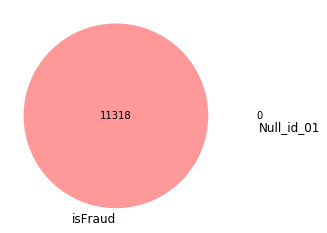

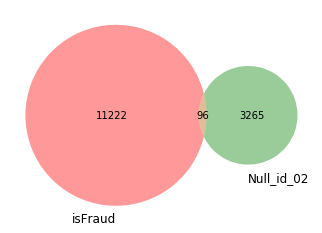

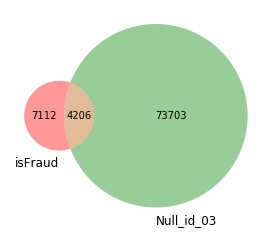

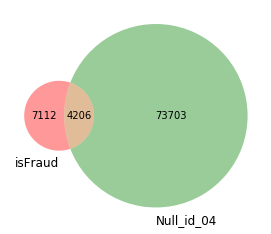

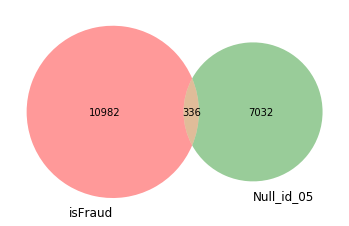

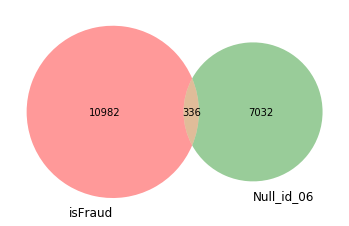

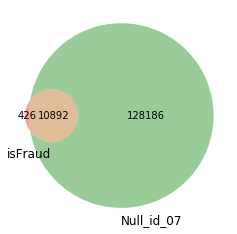

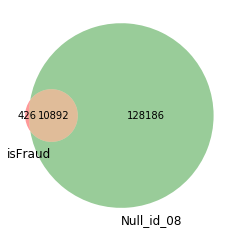

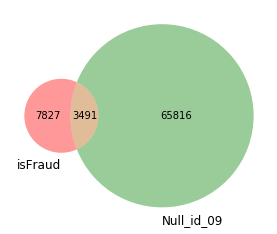

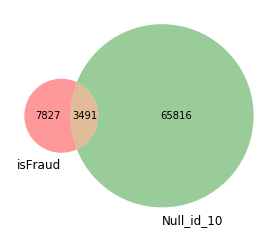

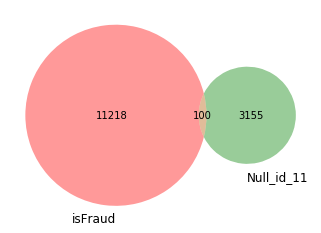

TypeError caught on id_12


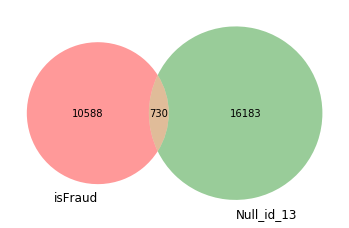

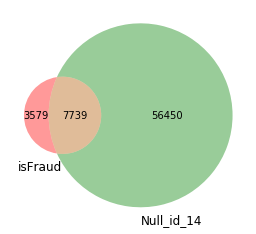

TypeError caught on id_15
TypeError caught on id_16


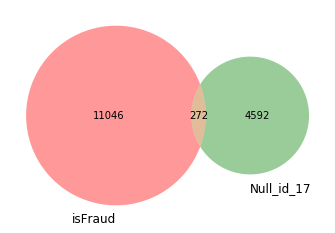

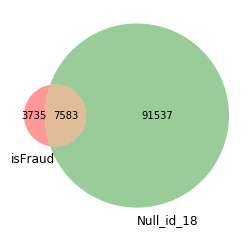

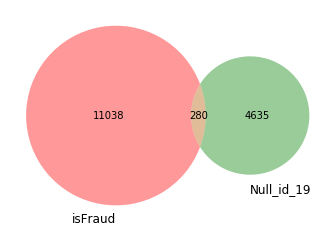

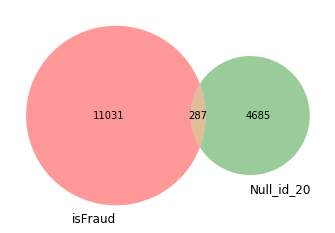

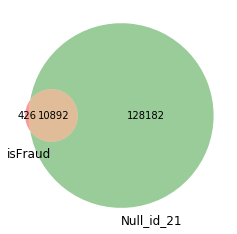

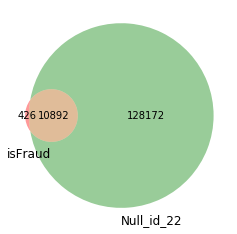

TypeError caught on id_23


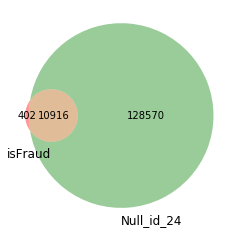

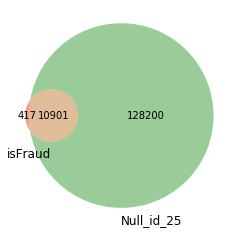

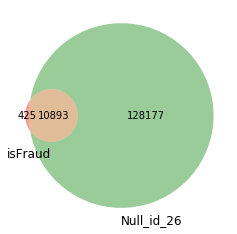

TypeError caught on id_27
TypeError caught on id_28
TypeError caught on id_29
TypeError caught on id_30
TypeError caught on id_31


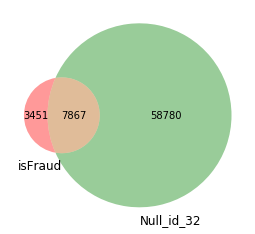

TypeError caught on id_33
TypeError caught on id_34
TypeError caught on id_35
TypeError caught on id_36
TypeError caught on id_37
TypeError caught on id_38
TypeError caught on DeviceType
TypeError caught on DeviceInfo


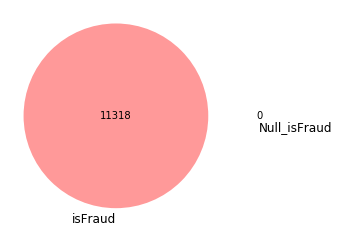

In [21]:
for colchk in df1.columns:
    try:
        venn2([set(df1.index[df1['isFraud'] == 1].tolist()),set(df1.index[df1[colchk].apply(np.isnan)].tolist())],set_labels=('isFraud','Null_{}'.format(colchk)))
        plt.show()
    except (TypeError):
        # isnan is not working on some columns. 
        # just passing them by for now.. Perhaps we need to re-cast those items
        # as NaNs? Or is there a value in "NotFound" ??
        print('TypeError caught on {}'.format(colchk))

# Looking into DF2. Null value and isFraud intersection.

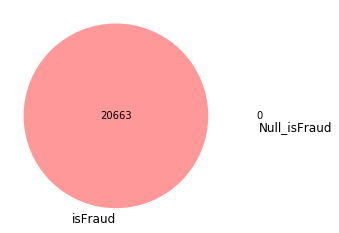

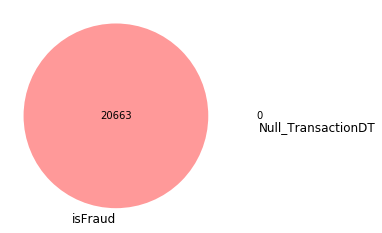

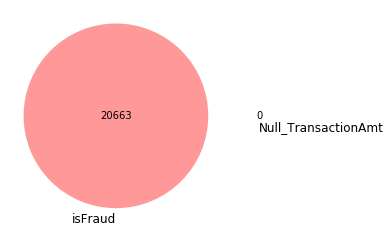

TypeError caught on ProductCD


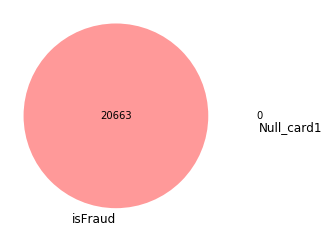

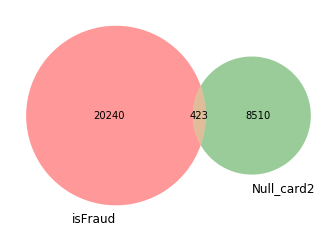

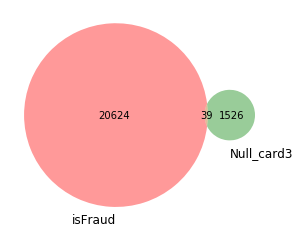

TypeError caught on card4


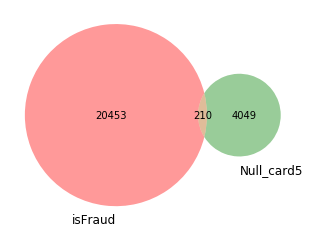

TypeError caught on card6


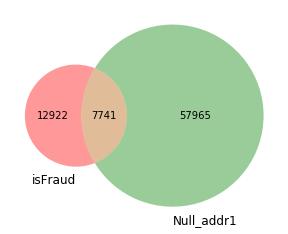

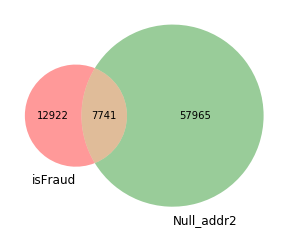

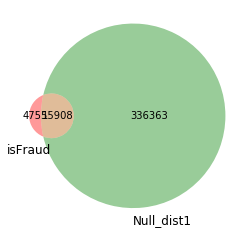

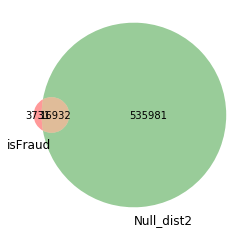

TypeError caught on P_emaildomain
TypeError caught on R_emaildomain


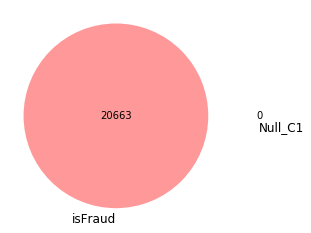

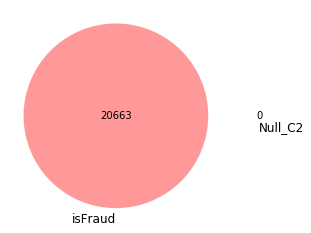

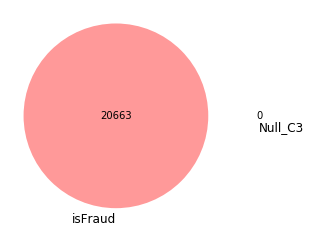

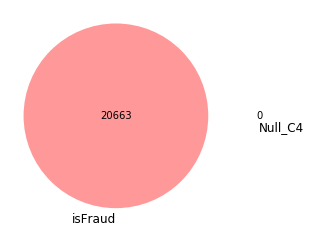

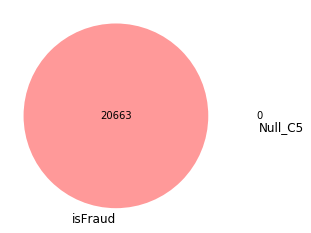

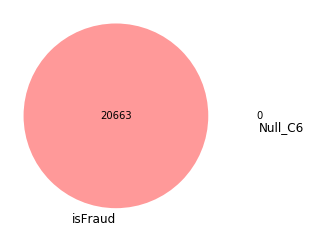

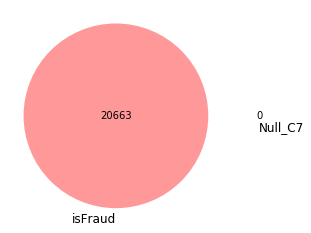

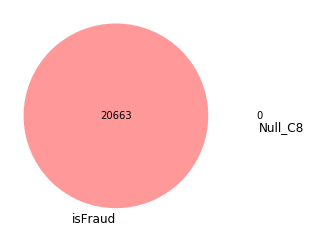

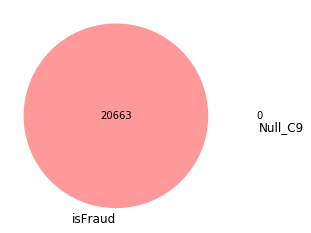

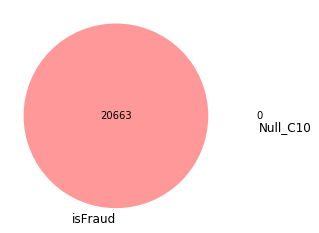

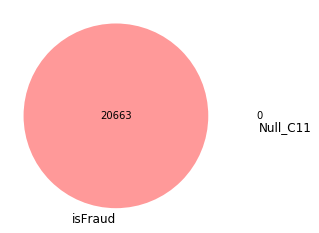

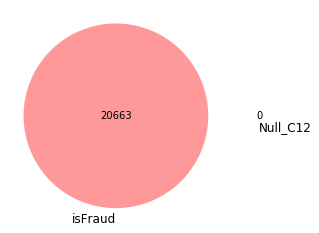

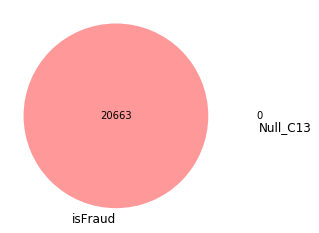

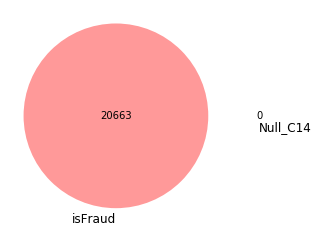

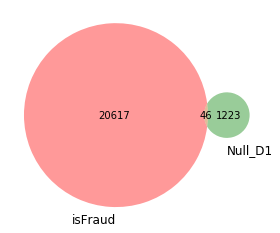

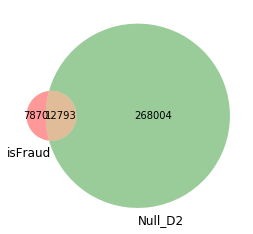

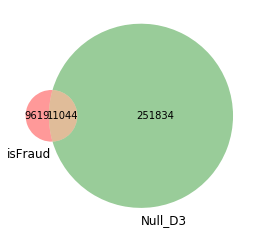

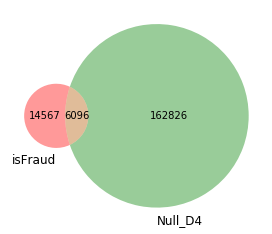

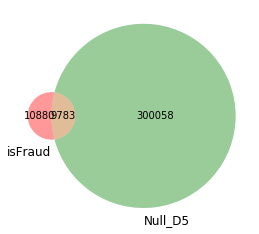

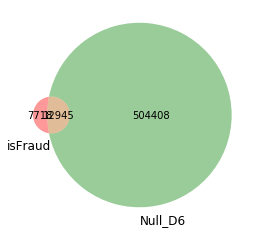

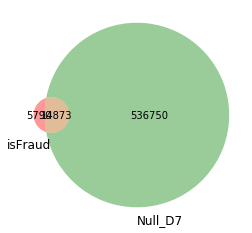

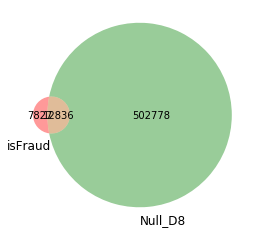

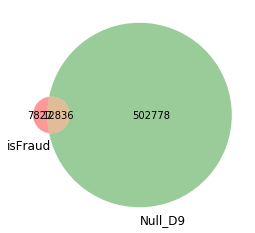

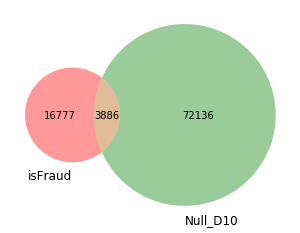

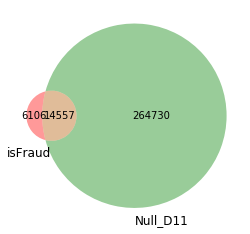

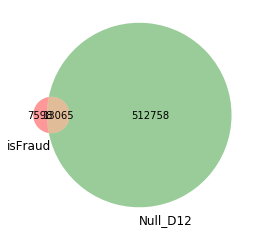

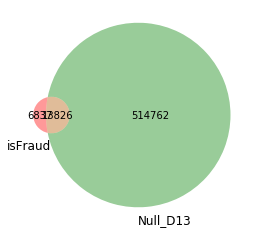

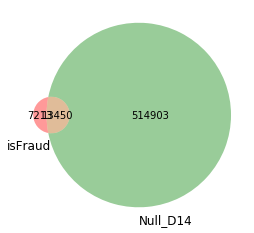

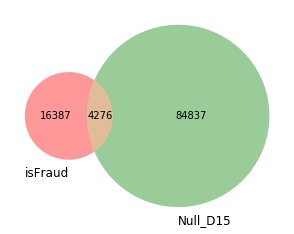

TypeError caught on M1
TypeError caught on M2
TypeError caught on M3
TypeError caught on M4
TypeError caught on M5
TypeError caught on M6
TypeError caught on M7
TypeError caught on M8
TypeError caught on M9


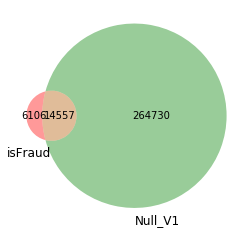

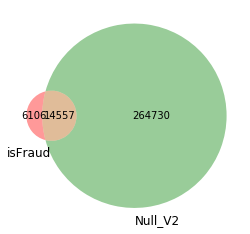

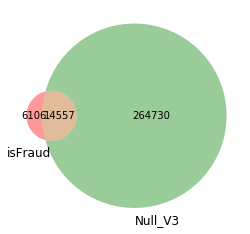

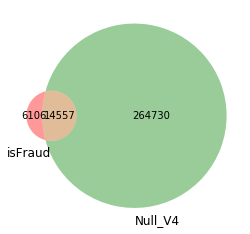

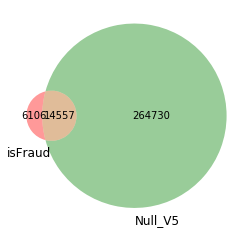

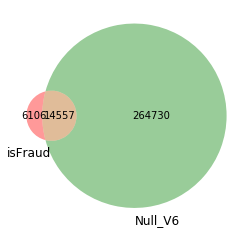

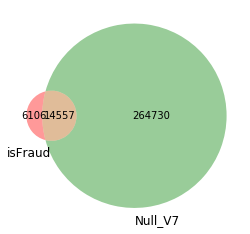

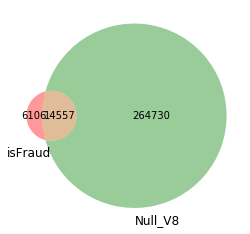

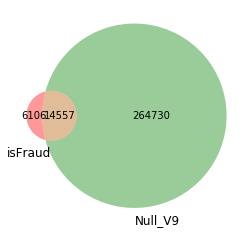

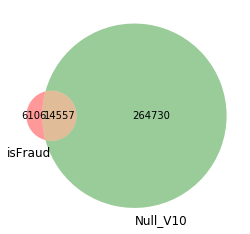

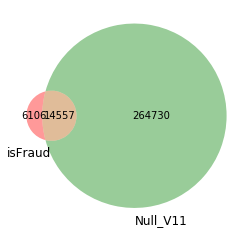

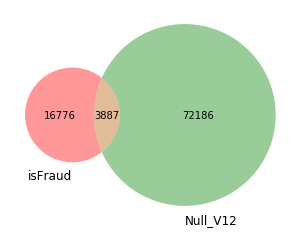

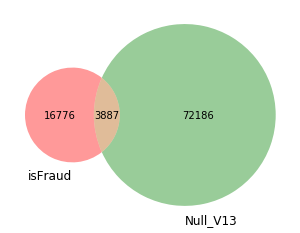

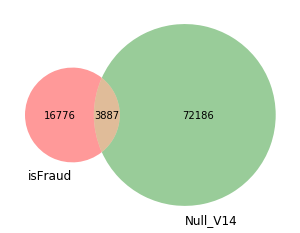

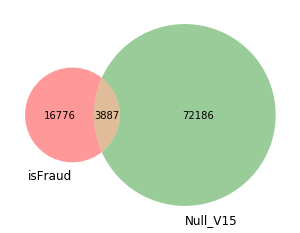

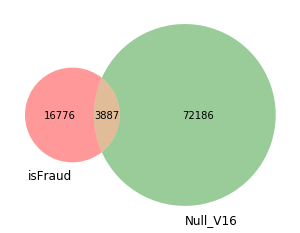

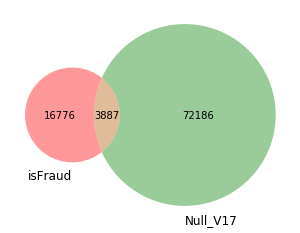

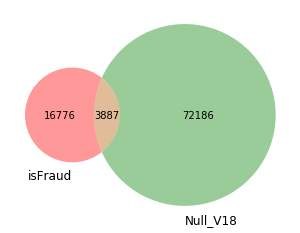

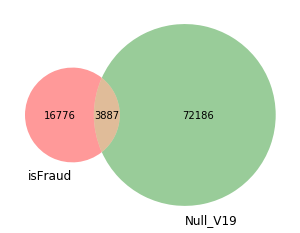

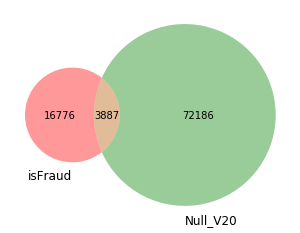

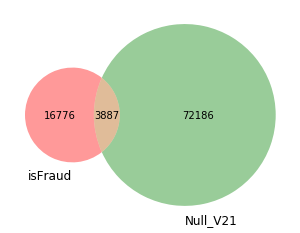

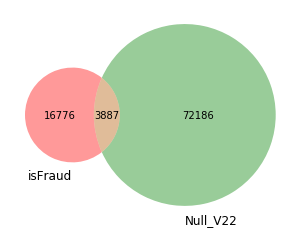

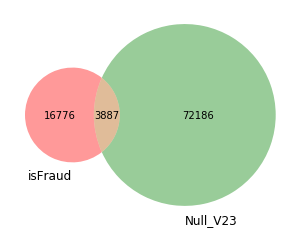

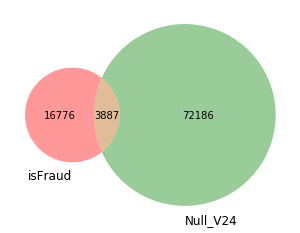

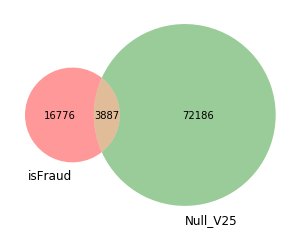

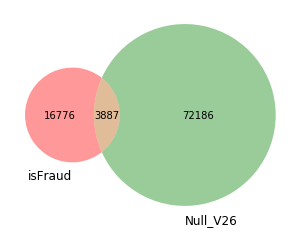

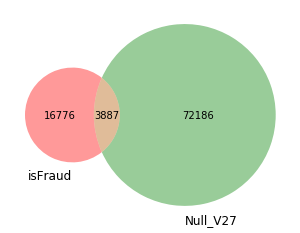

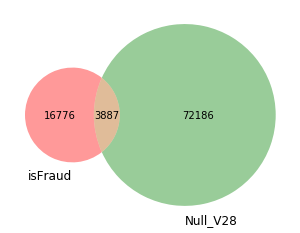

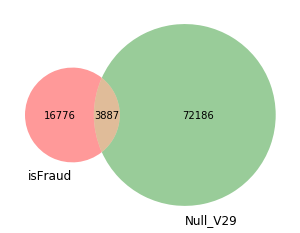

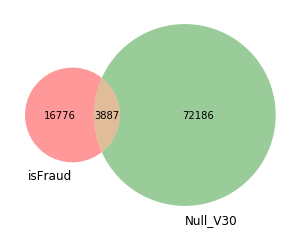

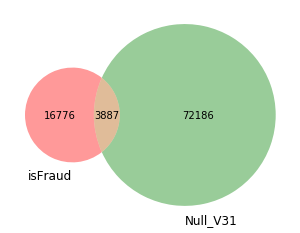

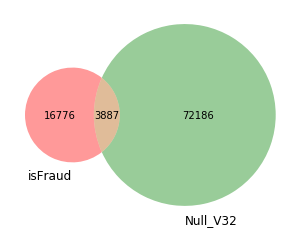

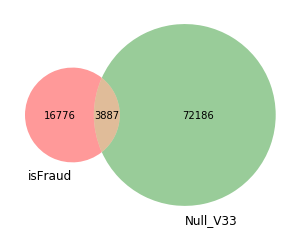

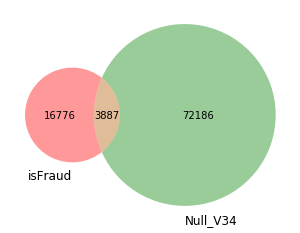

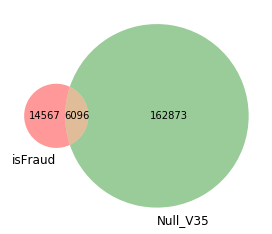

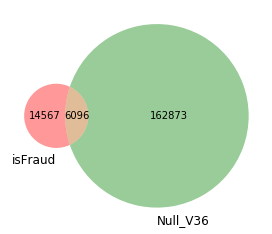

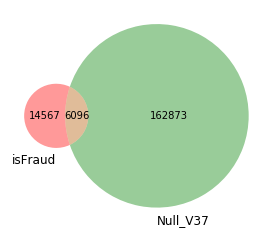

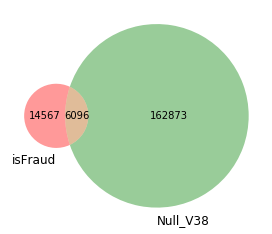

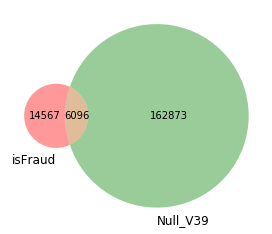

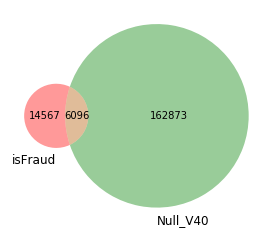

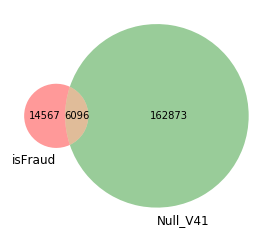

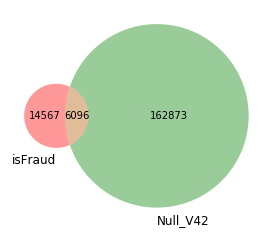

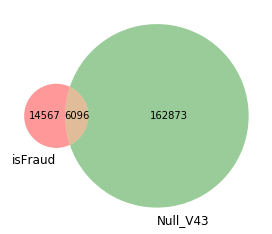

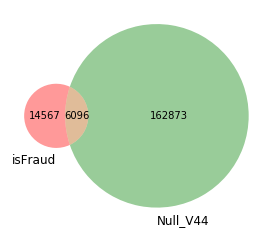

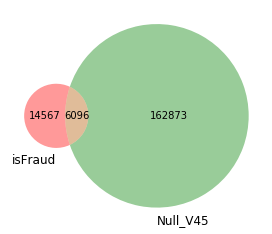

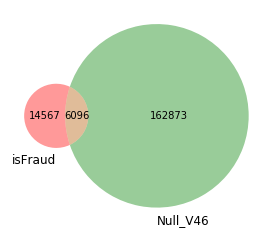

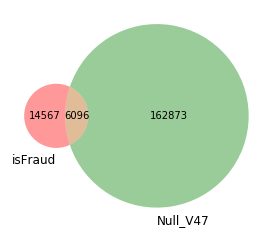

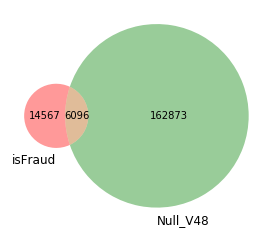

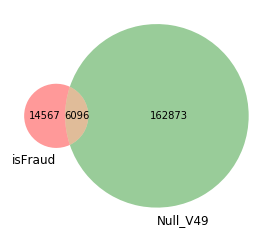

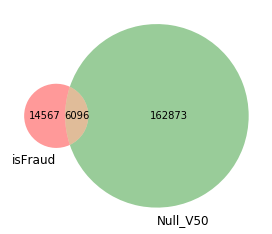

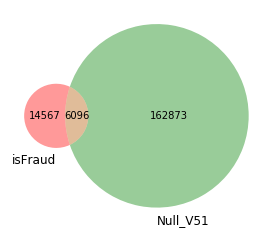

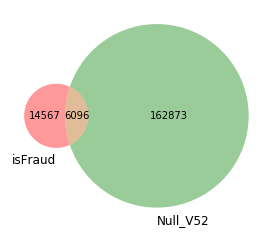

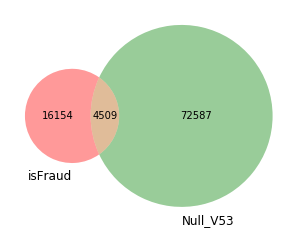

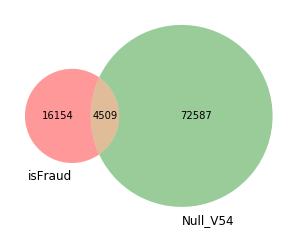

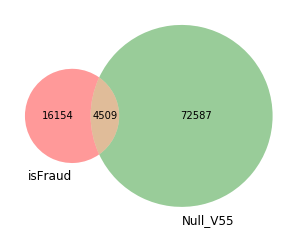

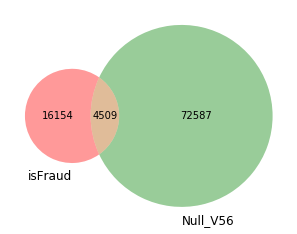

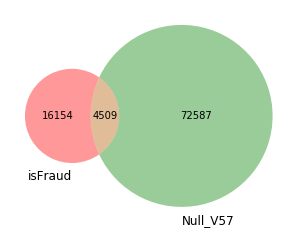

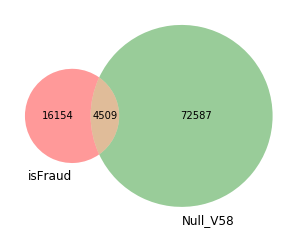

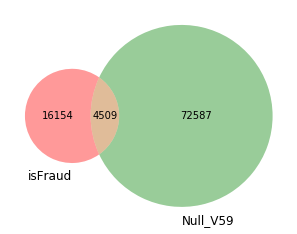

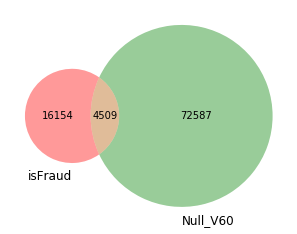

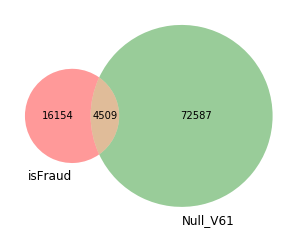

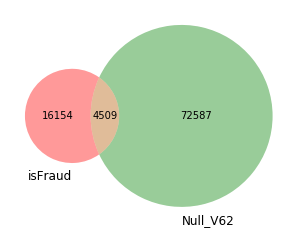

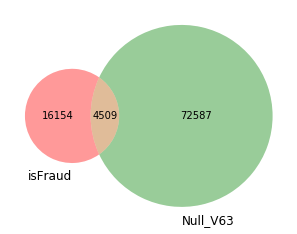

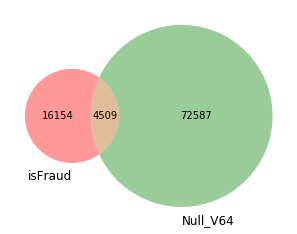

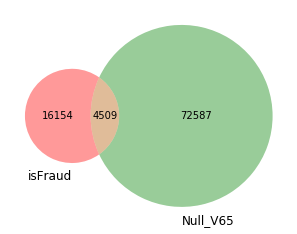

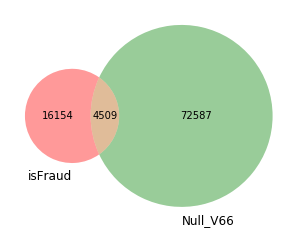

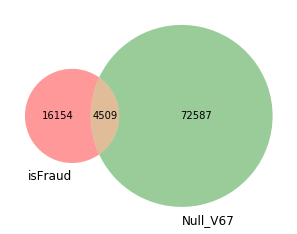

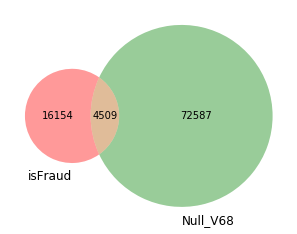

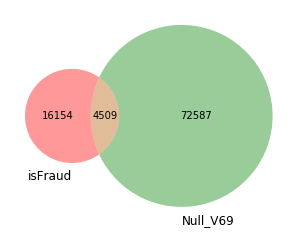

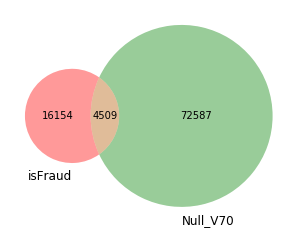

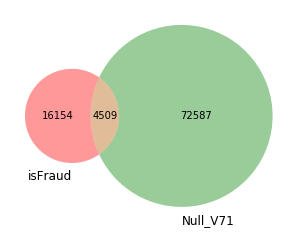

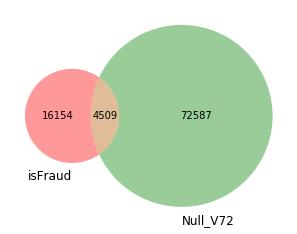

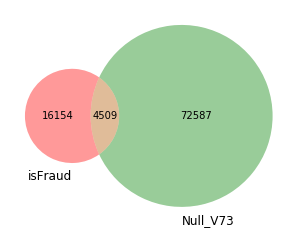

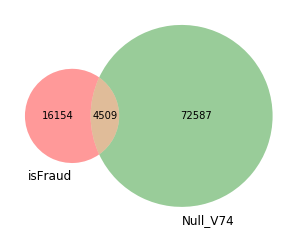

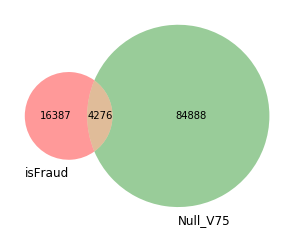

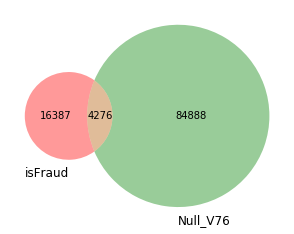

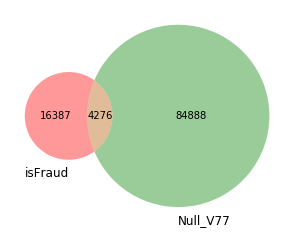

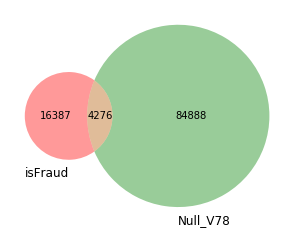

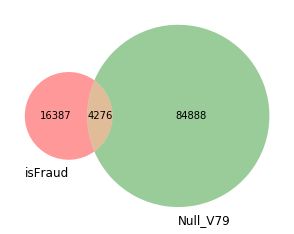

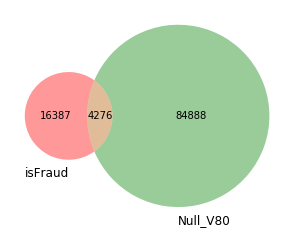

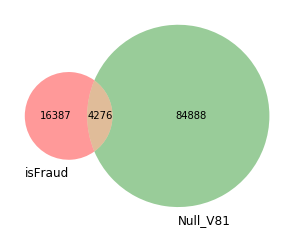

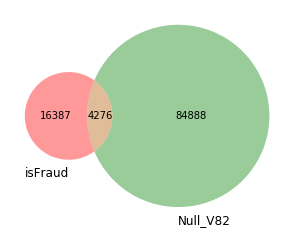

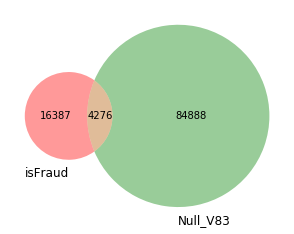

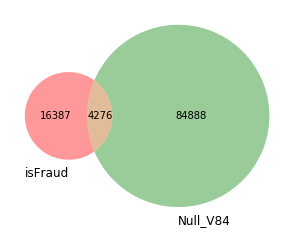

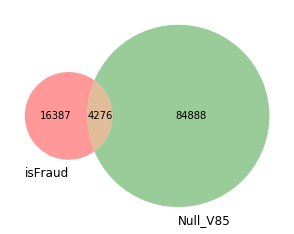

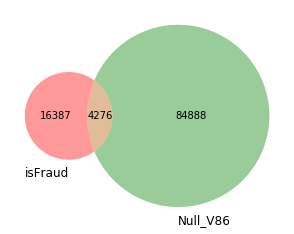

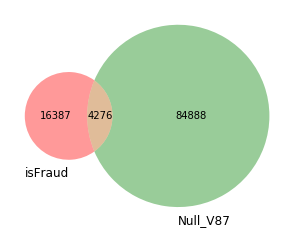

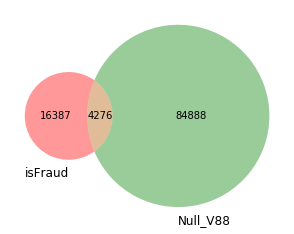

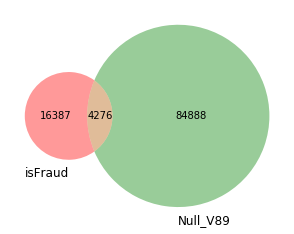

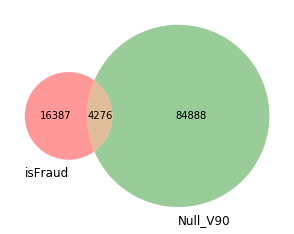

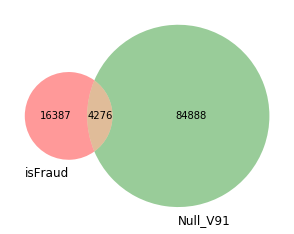

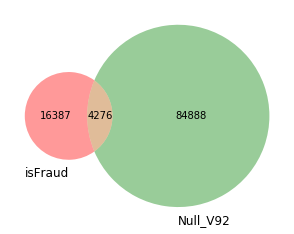

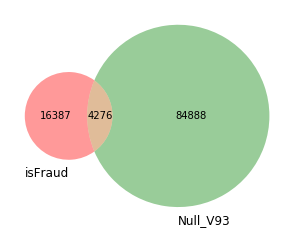

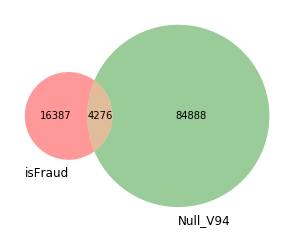

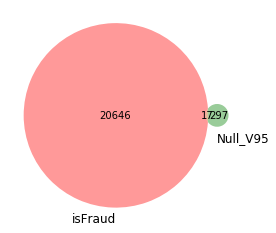

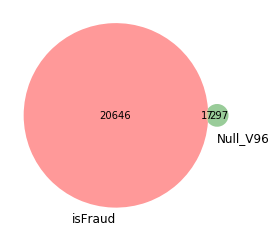

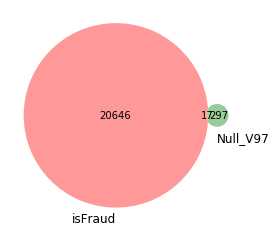

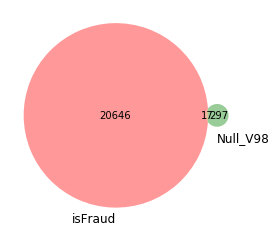

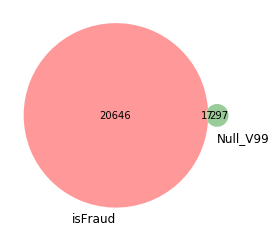

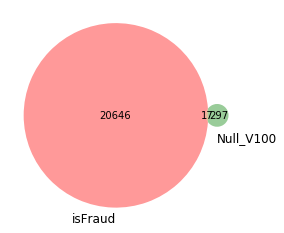

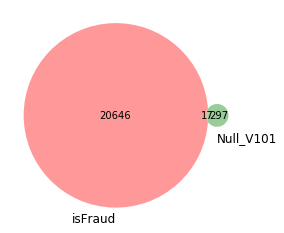

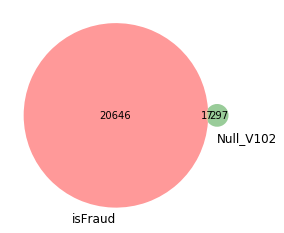

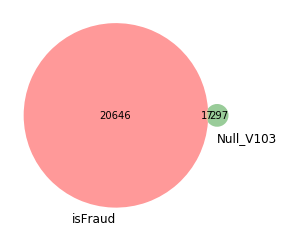

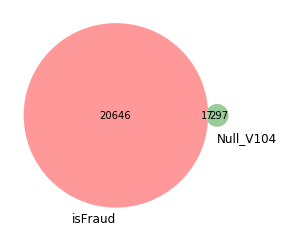

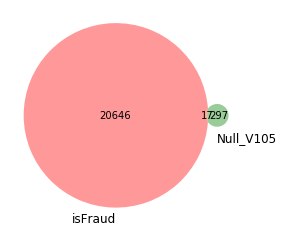

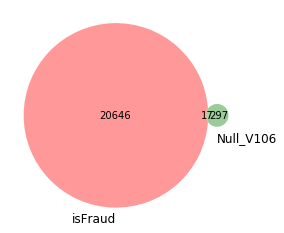

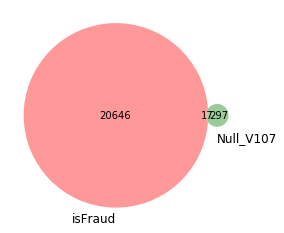

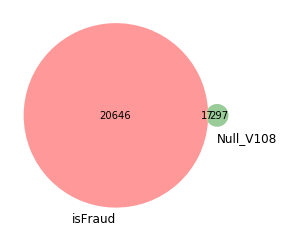

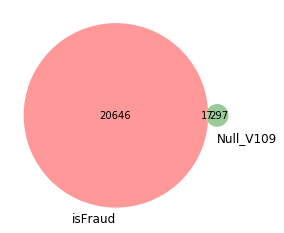

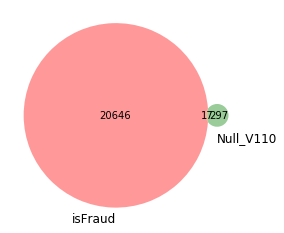

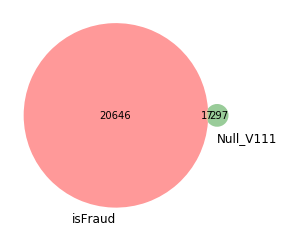

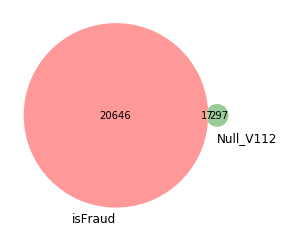

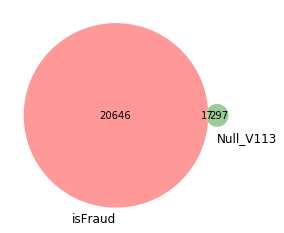

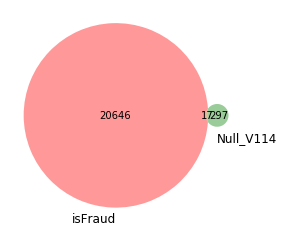

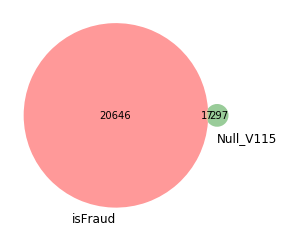

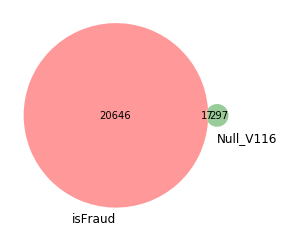

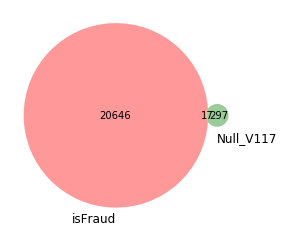

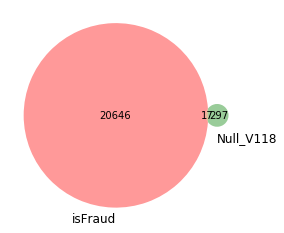

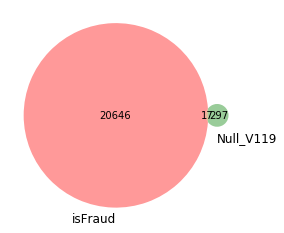

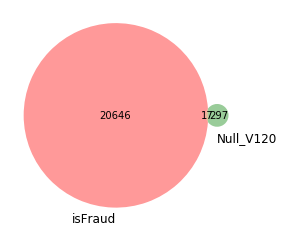

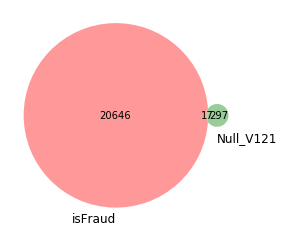

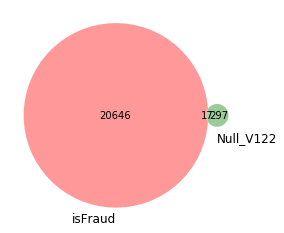

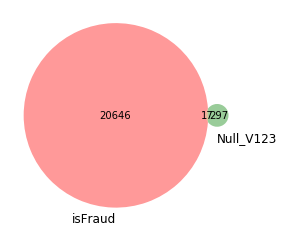

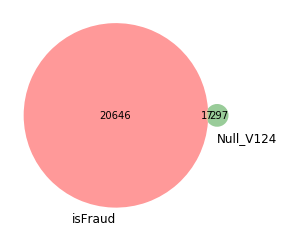

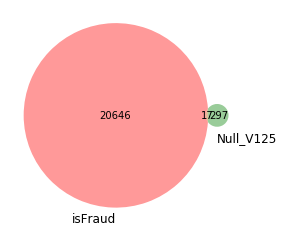

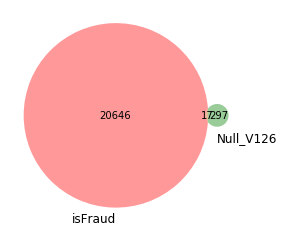

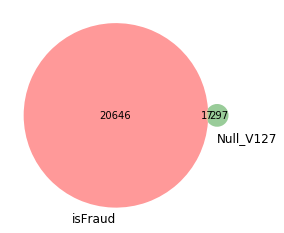

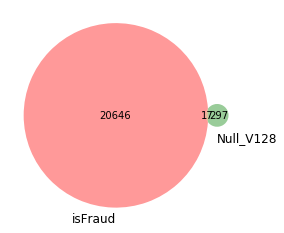

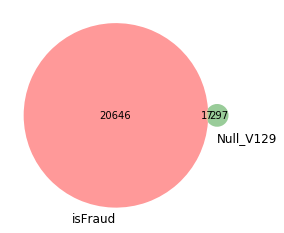

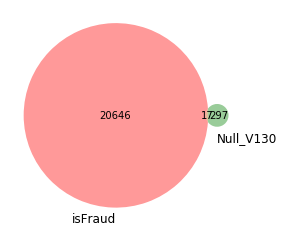

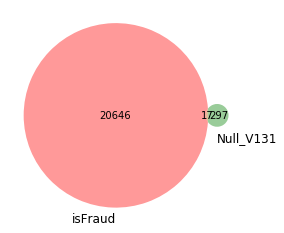

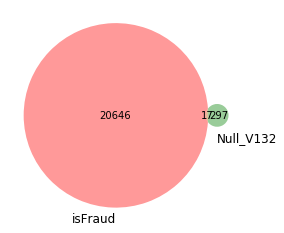

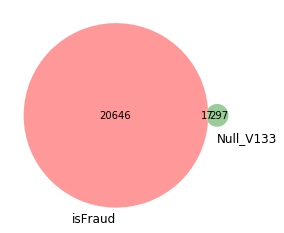

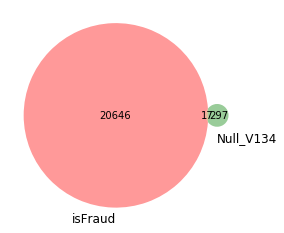

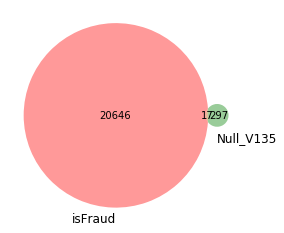

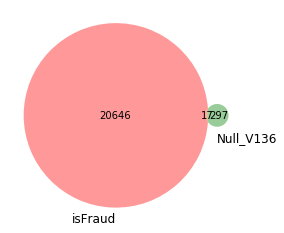

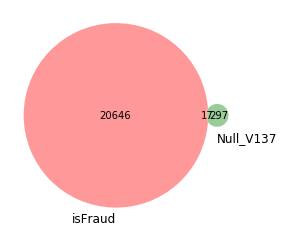

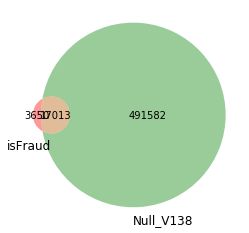

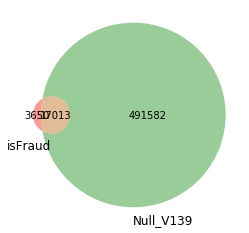

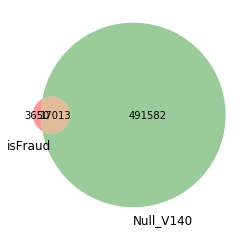

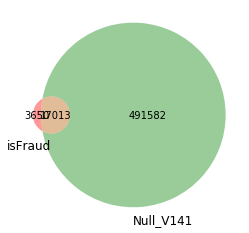

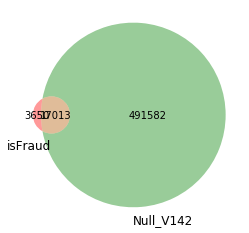

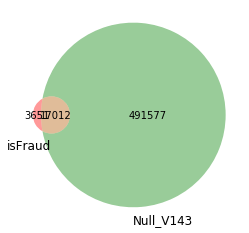

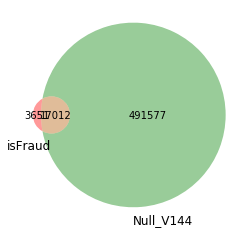

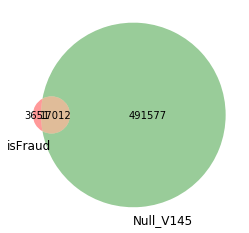

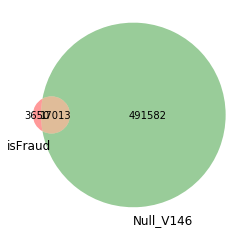

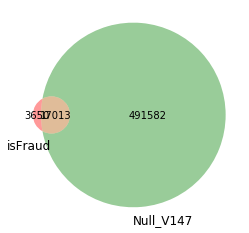

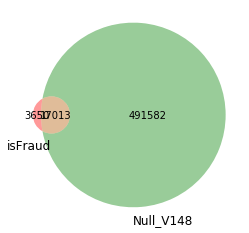

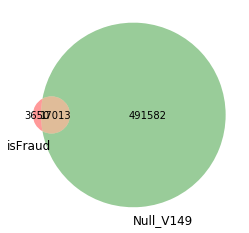

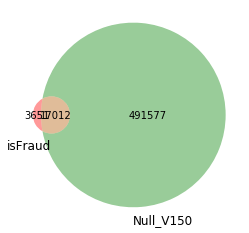

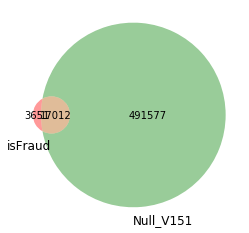

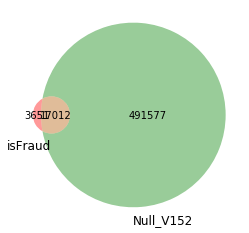

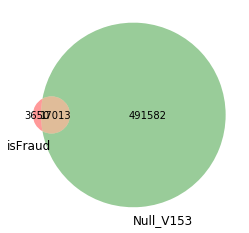

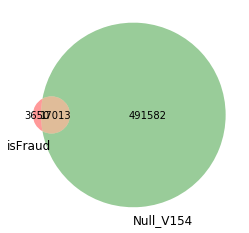

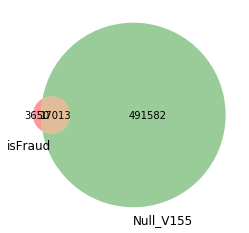

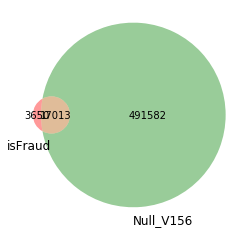

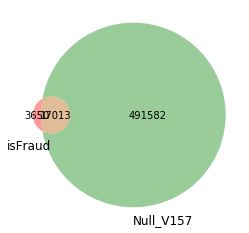

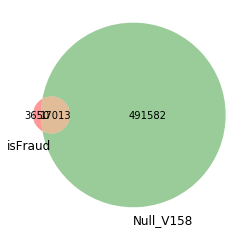

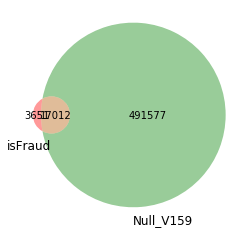

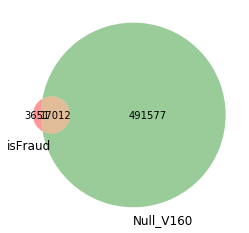

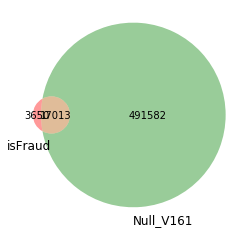

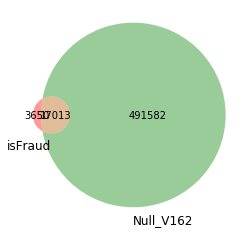

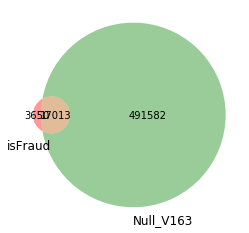

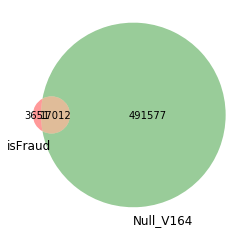

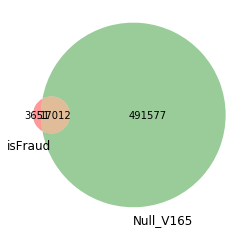

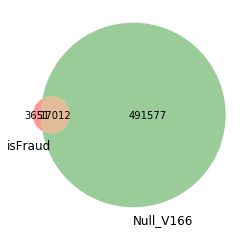

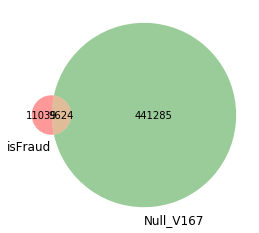

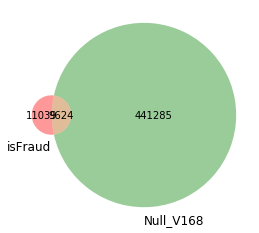

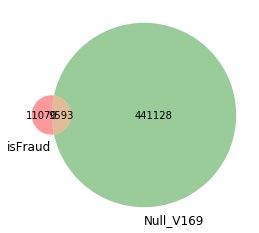

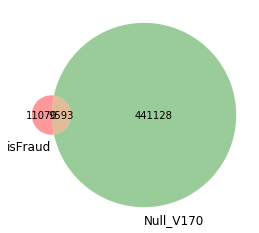

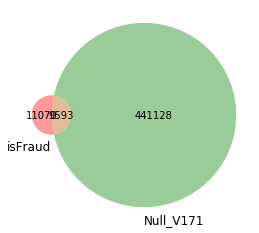

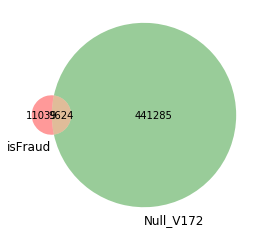

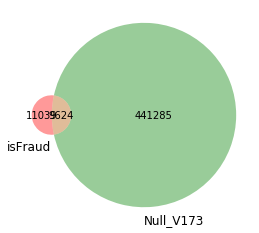

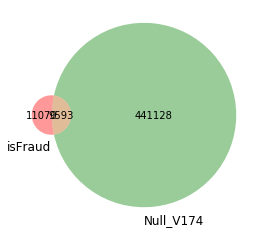

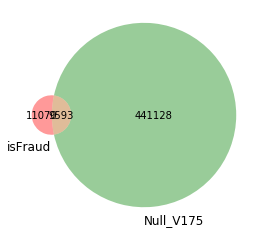

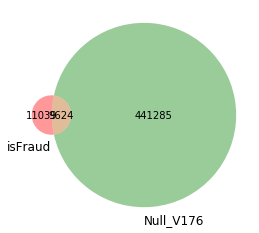

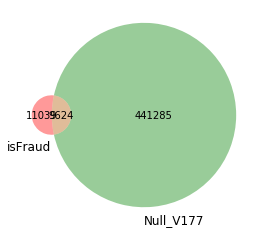

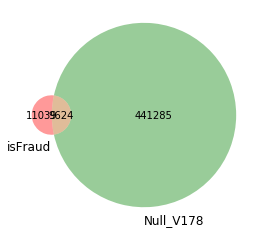

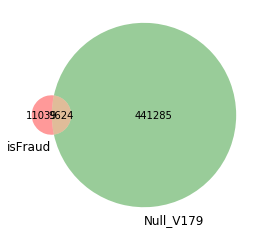

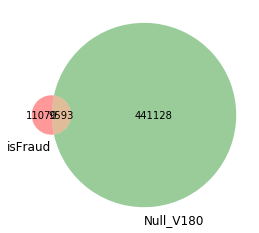

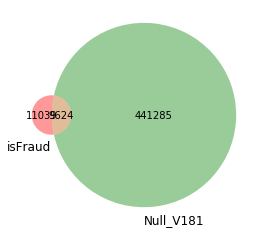

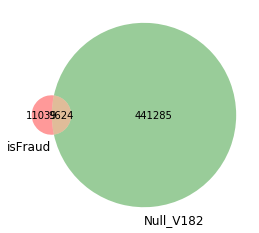

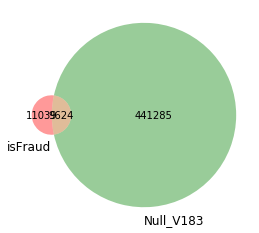

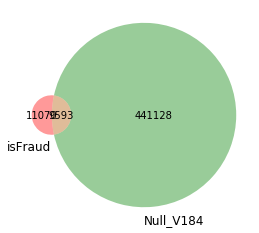

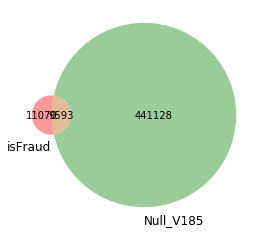

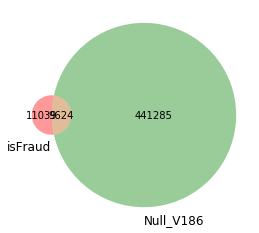

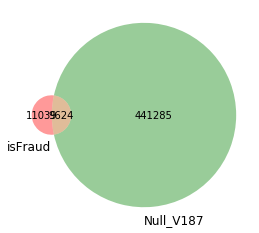

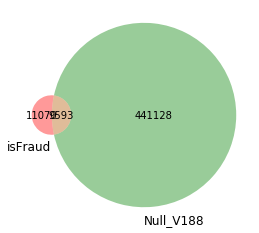

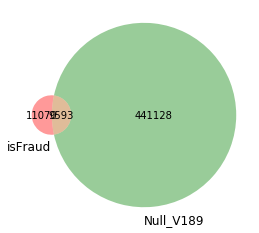

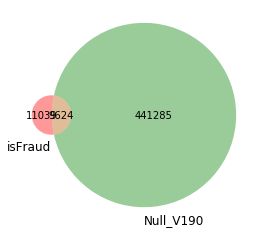

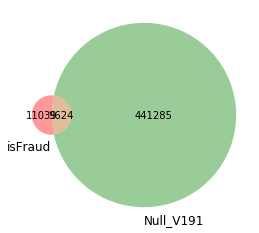

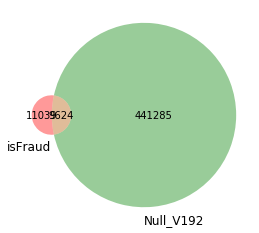

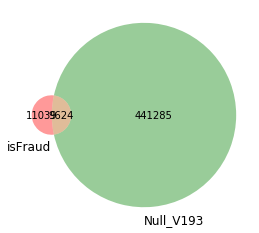

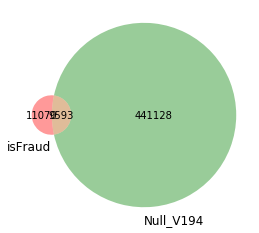

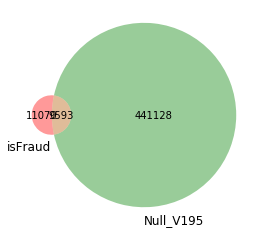

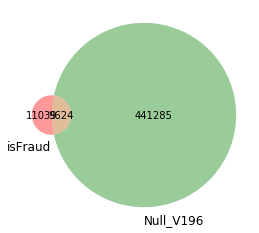

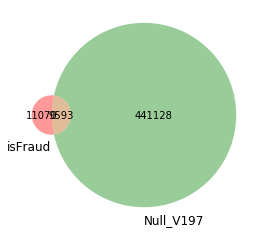

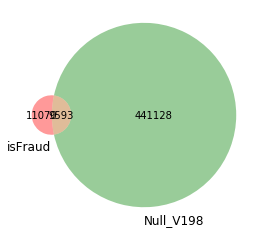

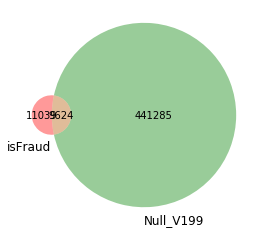

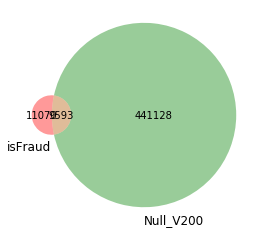

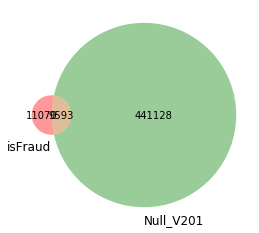

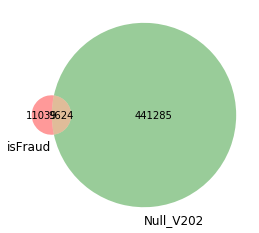

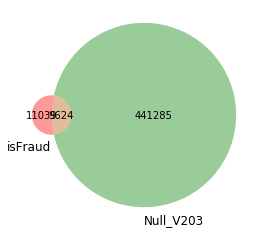

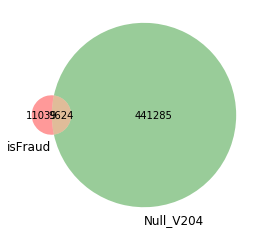

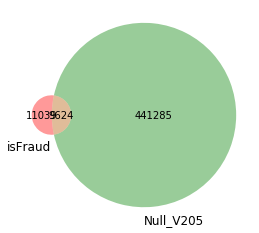

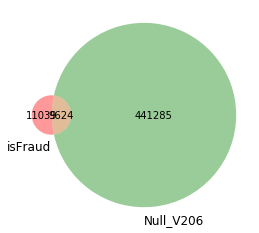

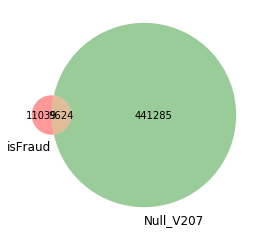

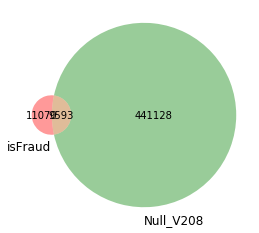

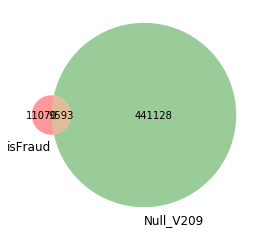

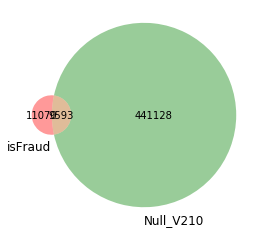

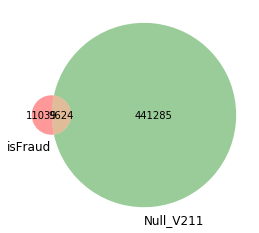

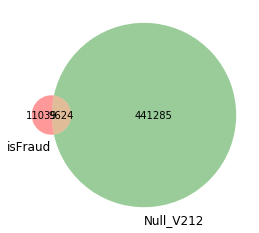

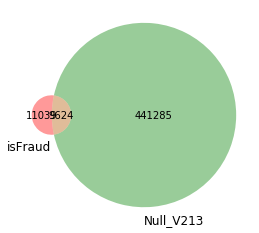

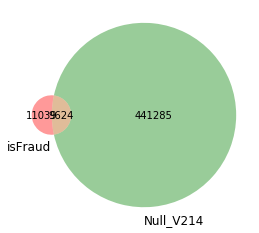

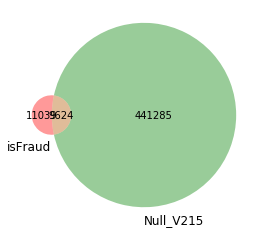

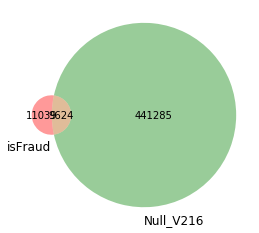

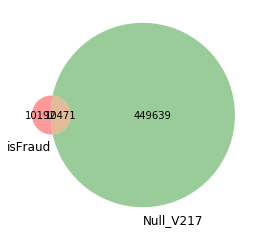

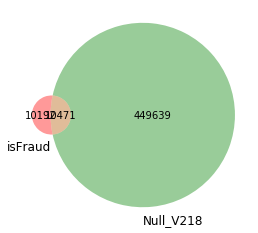

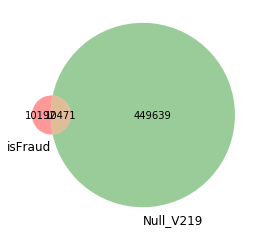

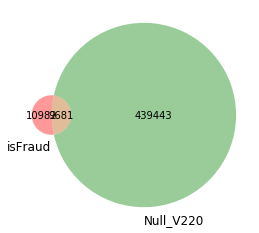

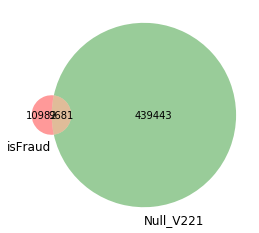

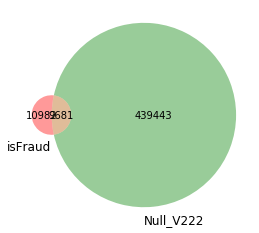

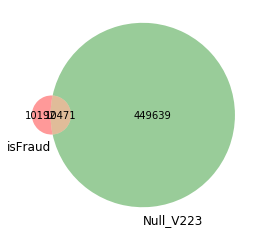

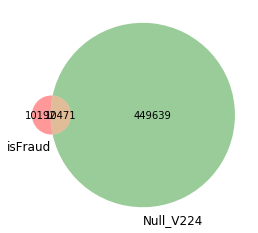

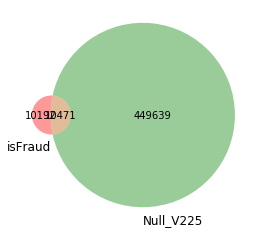

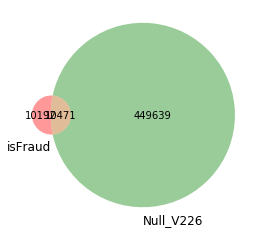

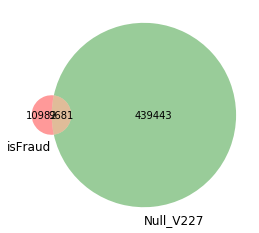

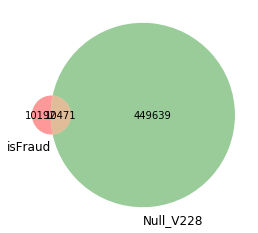

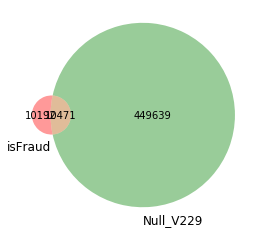

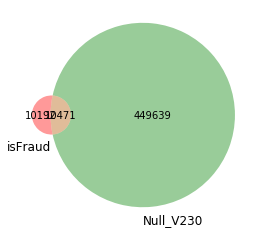

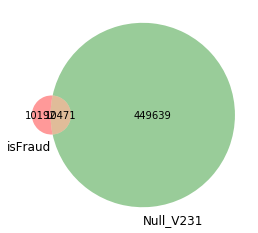

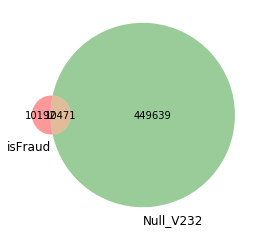

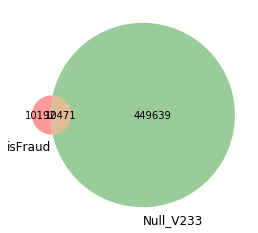

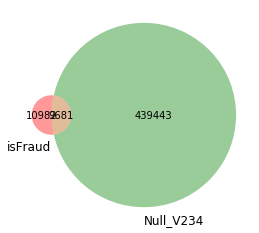

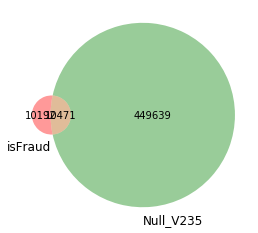

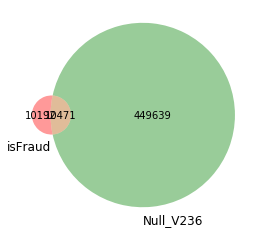

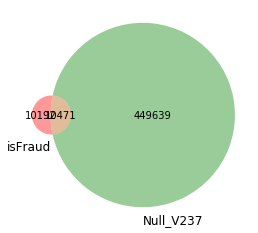

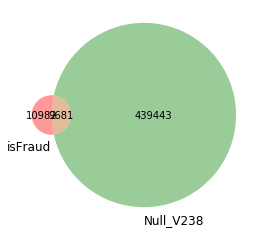

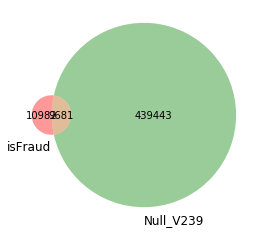

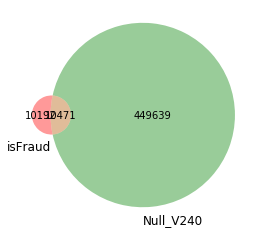

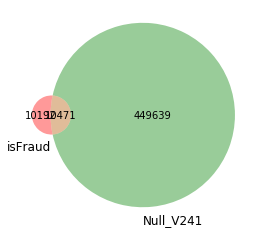

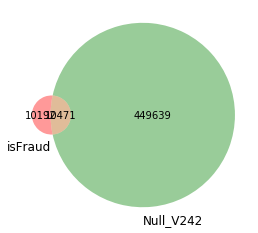

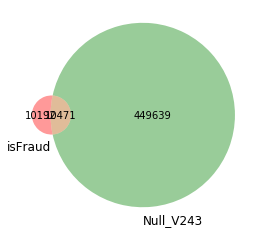

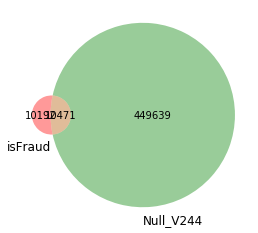

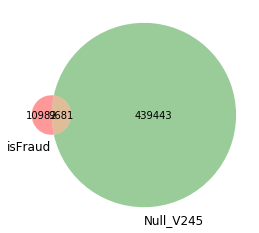

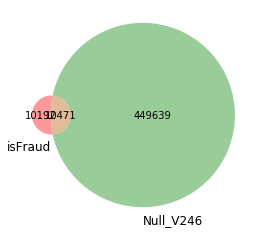

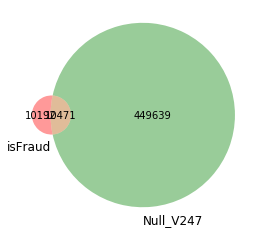

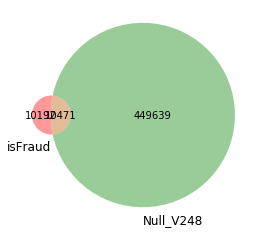

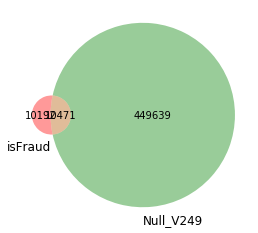

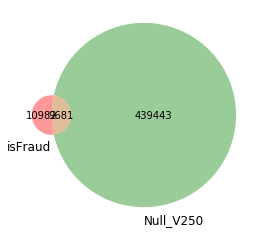

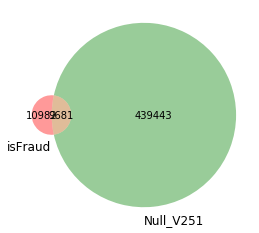

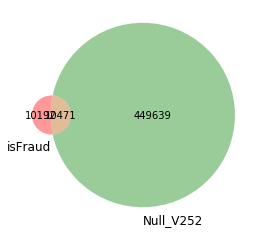

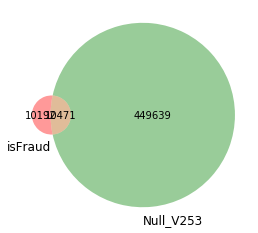

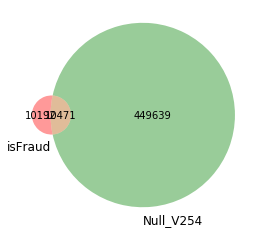

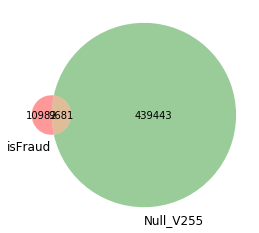

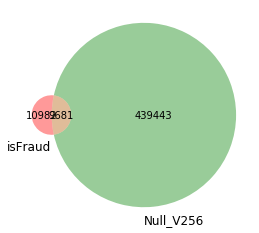

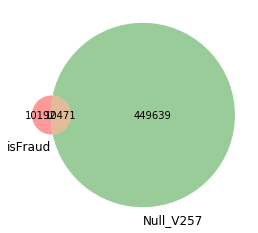

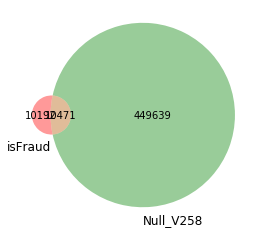

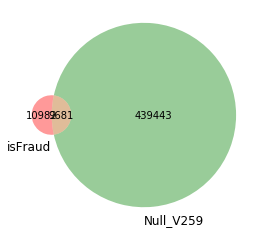

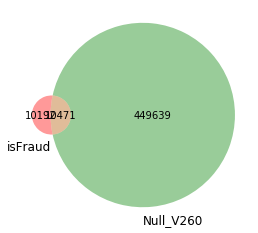

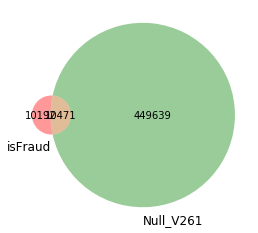

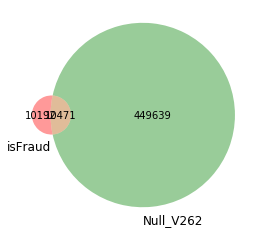

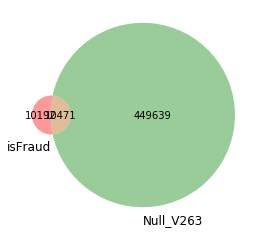

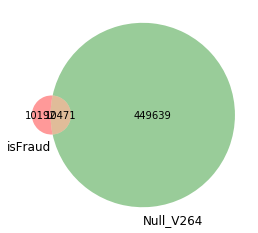

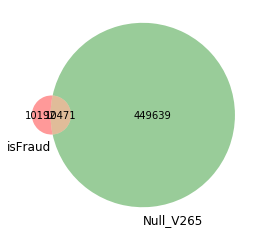

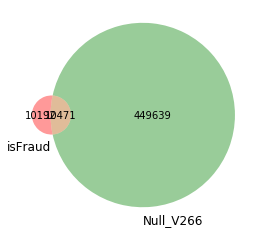

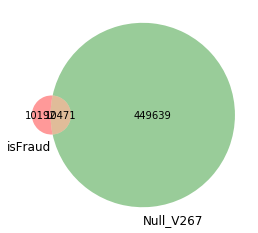

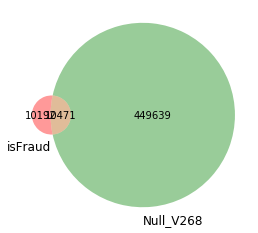

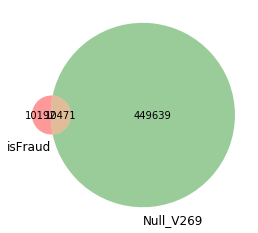

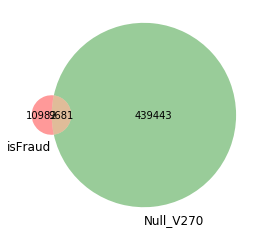

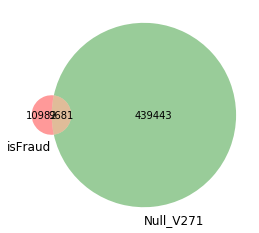

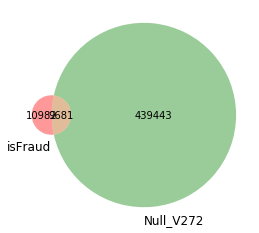

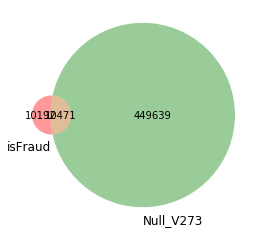

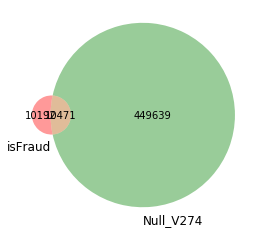

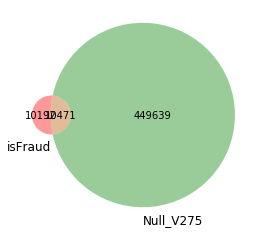

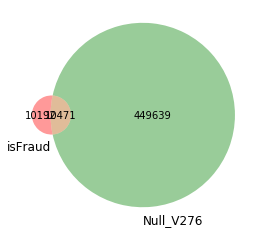

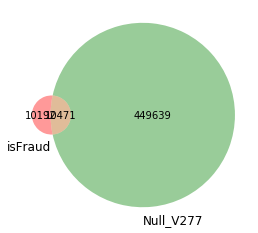

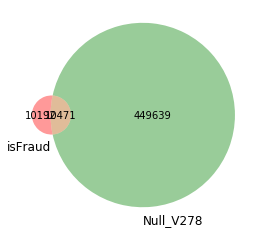

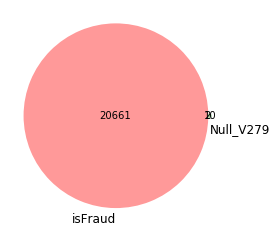

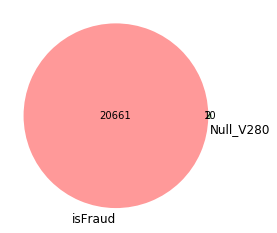

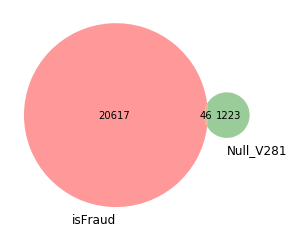

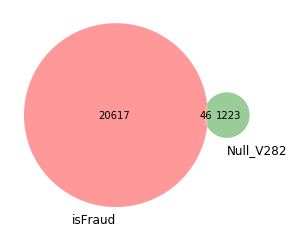

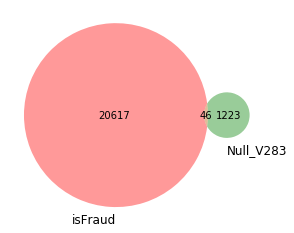

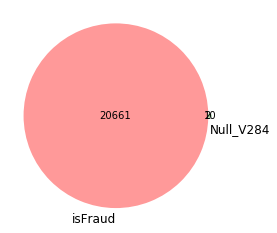

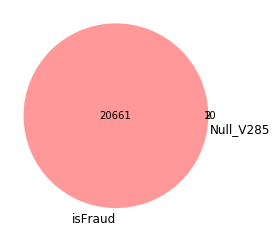

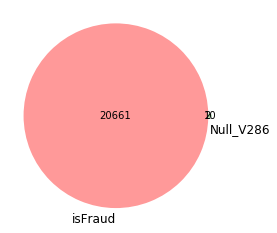

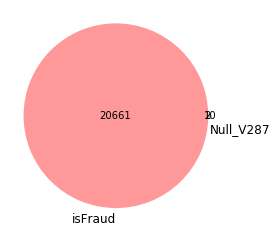

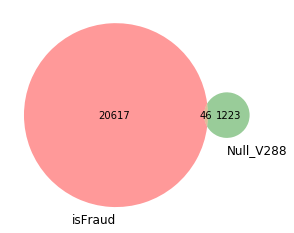

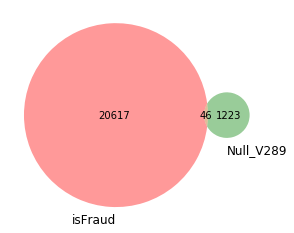

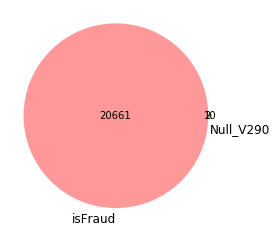

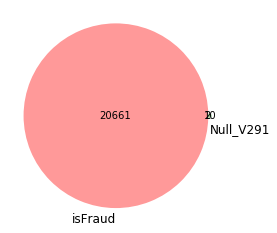

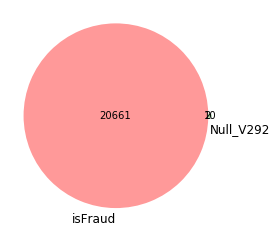

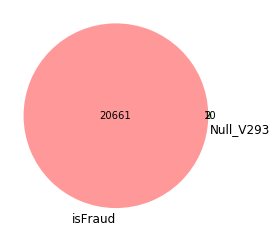

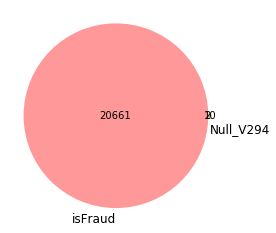

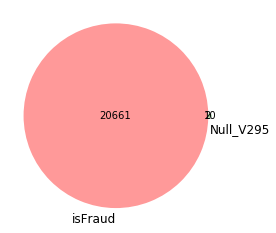

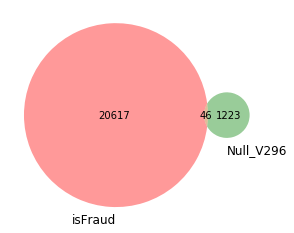

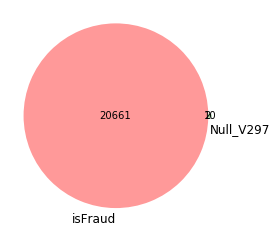

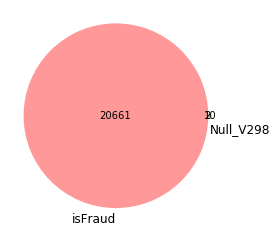

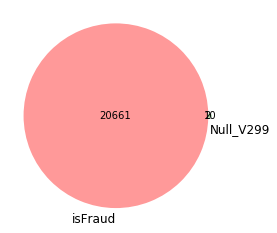

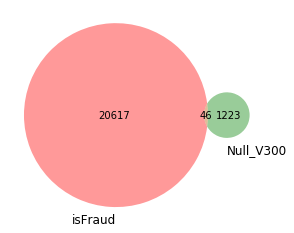

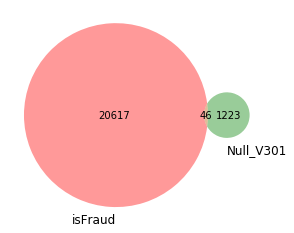

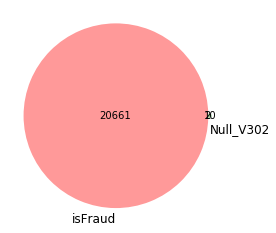

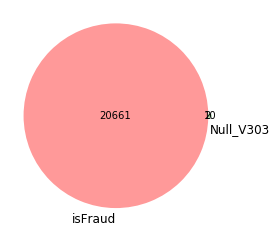

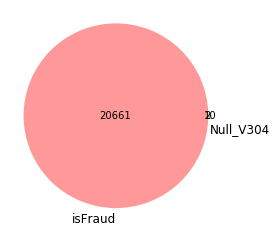

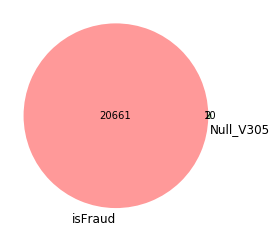

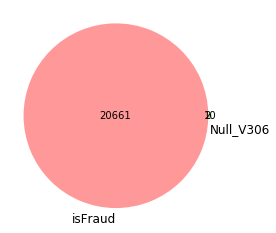

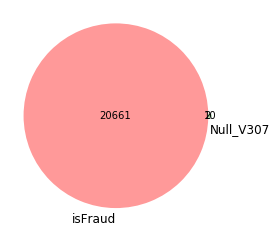

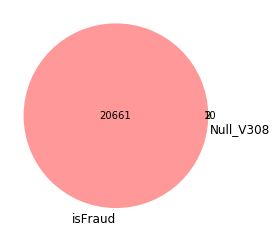

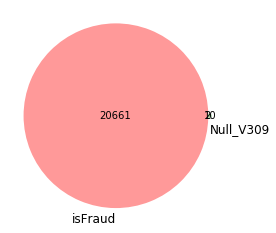

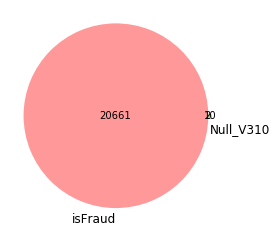

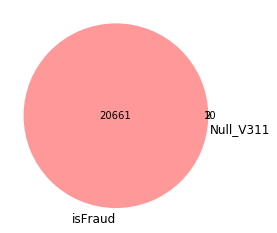

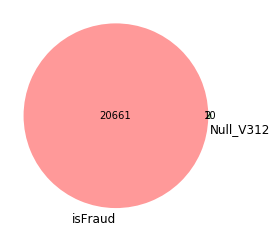

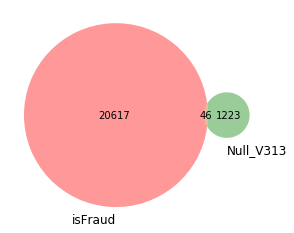

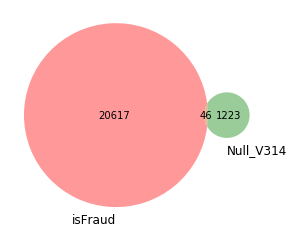

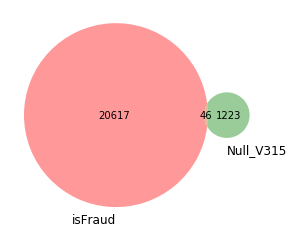

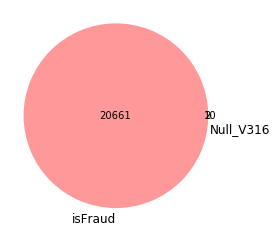

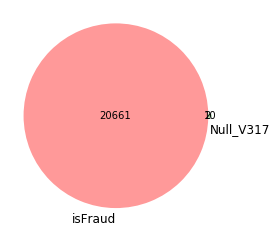

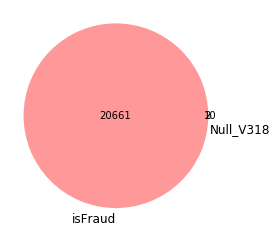

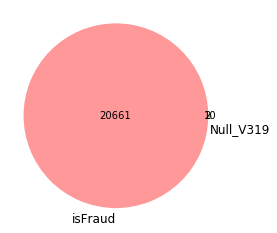

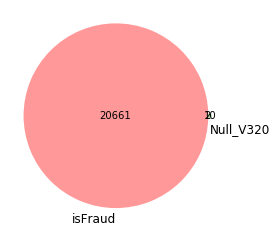

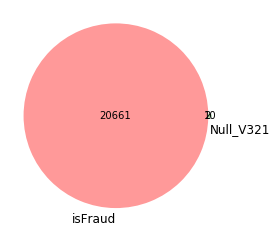

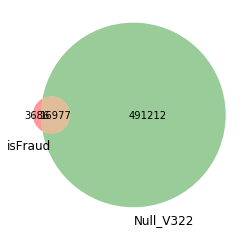

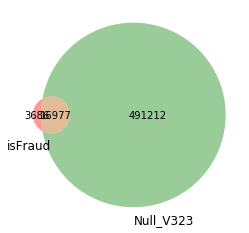

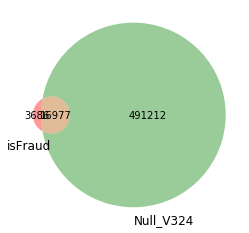

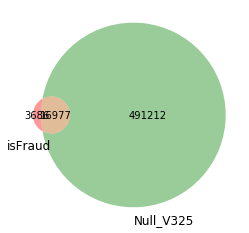

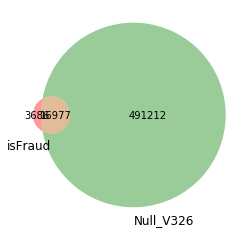

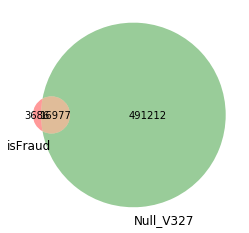

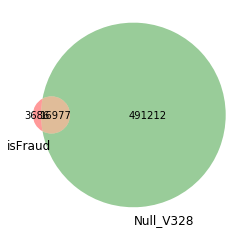

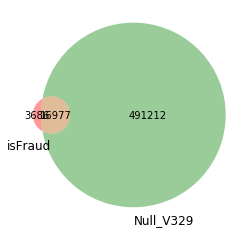

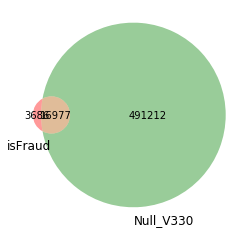

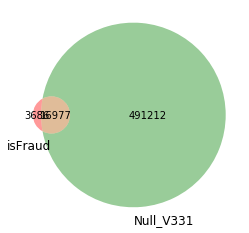

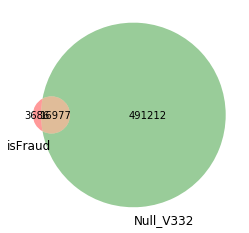

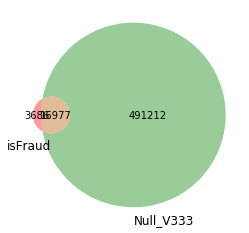

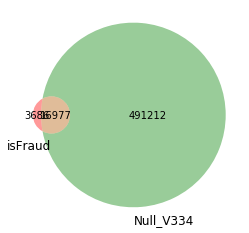

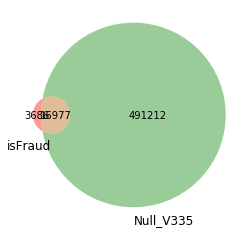

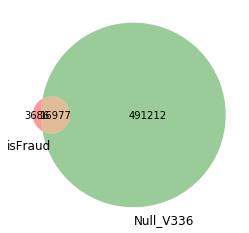

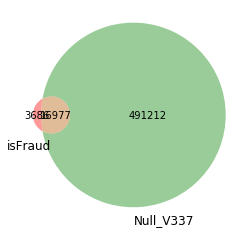

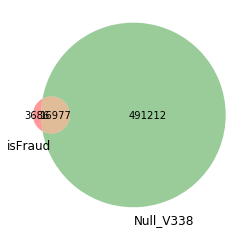

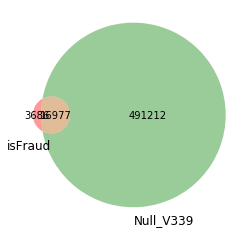

In [22]:
for colchk in df2.columns:
    try:
        venn2([set(df2.index[df2['isFraud'] == 1].tolist()),set(df2.index[df2[colchk].apply(np.isnan)].tolist())],set_labels=('isFraud','Null_{}'.format(colchk)))
        plt.show()
    except (TypeError):
        # isnan is not working on some columns. 
        # just passing them by for now.. Perhaps we need to re-cast those items
        # as NaNs? Or is there a value in "NotFound" ??
        print('TypeError caught on {}'.format(colchk))

In [23]:
df1.columns

Index(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'isFraud'],
      dtype='object')

In [ ]:
df2.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=393)

In [ ]:
df2.card1.is_unique

False

In [ ]:
df1.DeviceType.is_unique

False

In [ ]:
df2.addr1.is_unique

False

In [ ]:
df2.addr2.is_unique

False

In [ ]:
df2.addr1.head

<bound method NDFrame.head of TransactionID
2987000    315.0
2987001    325.0
2987002    330.0
2987003    476.0
2987004    420.0
2987005    272.0
2987006    126.0
2987007    325.0
2987008    337.0
2987009    204.0
2987010      NaN
2987011      NaN
2987012    204.0
2987013    330.0
2987014    226.0
2987015    315.0
2987016    170.0
2987017    204.0
2987018    184.0
2987019    264.0
2987020    299.0
2987021    204.0
2987022    299.0
2987023    126.0
2987024    264.0
2987025    441.0
2987026    472.0
2987027    337.0
2987028    251.0
2987029    204.0
           ...  
3577510    204.0
3577511    110.0
3577512    110.0
3577513    315.0
3577514    337.0
3577515    472.0
3577516    204.0
3577517    110.0
3577518    272.0
3577519    264.0
3577520    204.0
3577521      NaN
3577522    325.0
3577523    299.0
3577524    387.0
3577525    310.0
3577526    272.0
3577527    264.0
3577528    299.0
3577529      NaN
3577530    299.0
3577531    337.0
3577532    231.0
3577533    485.0
3577534      NaN
3577

(array([4.0000e+01, 3.1000e+01, 0.0000e+00, 3.2240e+03, 1.0000e+00,
        1.0000e+00, 4.0000e+00, 1.7723e+04, 1.5249e+04, 3.4400e+02,
        1.3000e+01, 1.0000e+00, 1.0000e+00, 9.8240e+03, 8.0000e+00,
        9.6000e+01, 9.0000e+00, 3.2000e+01, 1.7360e+03, 4.2400e+02,
        2.0000e+00, 6.1000e+01, 2.0130e+03, 5.0000e+00, 4.6750e+03,
        1.3857e+04, 1.5162e+04, 2.0000e+00, 2.0000e+00, 1.4982e+04,
        1.5740e+03, 1.6000e+01, 9.0000e+00, 5.1554e+04, 2.0000e+00,
        8.0000e+00, 5.0000e+00, 6.1000e+01, 5.0500e+03, 3.0000e+00,
        1.0191e+04, 7.6050e+03, 3.0000e+00, 5.0000e+00, 3.2000e+01,
        8.6000e+01, 2.0000e+00, 9.0000e+00, 5.2210e+03, 1.1270e+03,
        4.2000e+01, 8.0000e+00, 3.9874e+04, 1.0000e+00, 6.4070e+03,
        2.0143e+04, 2.6000e+01, 3.0000e+00, 7.7500e+02, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 3.7400e+02, 4.6344e+04, 1.0000e+01,
        1.3000e+01, 1.2850e+03, 8.4870e+03, 2.3082e+04, 2.0000e+00,
        2.0000e+00, 2.1770e+03, 5.1177e+04, 2.62

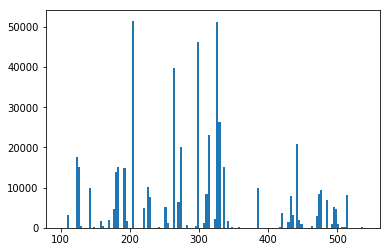

In [ ]:
plt.hist(x=df2[~np.isnan(df2.addr1)].addr1,bins='auto')

(array([1.60000e+01, 6.60000e+01, 4.40000e+01, 4.90000e+01, 6.60000e+01,
        1.10000e+02, 9.00000e+00, 1.50000e+01, 1.20000e+01, 1.00000e+01,
        1.70000e+01, 3.10800e+03, 8.60000e+01, 3.50000e+01, 1.50000e+01,
        1.20000e+01, 3.00000e+00, 5.20488e+05, 4.00000e+00, 6.41000e+02,
        2.80000e+01]),
 array([ 10.        ,  14.38095238,  18.76190476,  23.14285714,
         27.52380952,  31.9047619 ,  36.28571429,  40.66666667,
         45.04761905,  49.42857143,  53.80952381,  58.19047619,
         62.57142857,  66.95238095,  71.33333333,  75.71428571,
         80.0952381 ,  84.47619048,  88.85714286,  93.23809524,
         97.61904762, 102.        ]),
 <a list of 21 Patch objects>)

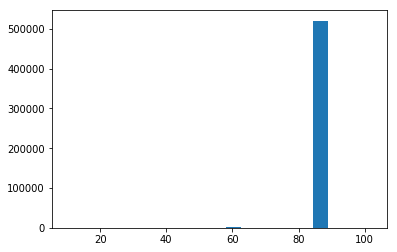

In [ ]:
plt.hist(x=df2[~np.isnan(df2.addr2)].addr2,bins='auto')

(array([  2.,   0.,   0.,   0.,   1.,   0.,   1.,   8.,   4.,   3.,   1.,
          7.,   5.,   8.,   5.,   7.,  19.,  13.,  15.,  33.,  41.,  57.,
         66., 460., 203., 319., 260., 239., 262., 338., 403., 431., 306.,
        208., 260., 268., 148., 266., 140., 131.,  57.,  37.,  38.,  34.,
         18.,  14.,   9.,   1.,   6.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-46.        , -44.05454545, -42.10909091, -40.16363636,
        -38.21818182, -36.27272727, -34.32727273, -32.38181818,
        -30.43636364, -28.49090909, -26.54545455, -24.6       ,
        -22.65454545, -20.70909091, -18.76363636, -16.81818182,
        -14.87272727, -12.92727273, -10.98181818,  -9.03636364,
         -7.09090909,  -5.14545455,  -3.2       ,  -1.25454545,
          0.69090909,   2.63636364,   4.58181818,   6.52727273,
          8.47272727,  10.41818182,  12.36363636,  14.30909091,
         16.25454545,  18.2       ,  20.14545455,  22.09090909,
         24.03636364,  25.98181818,  27.92727273,  2

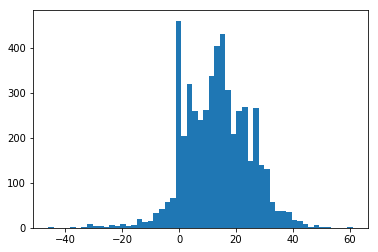

In [ ]:
plt.hist(x=df1[~np.isnan(df1.id_07)].id_07,bins='auto')

#Applying np.unique does not work for python objects. 
# best to use pandas.unique() function as
# later discovered.
a,c = np.unique(df1['id_12'],return_counts=True)

c.sort()

a.dtype

a[~np.isnan(a.astype('U10'))].shape[0]

c

df1[~np.isnan(df1['id_11'])]['id_11'].shape[0]

len(c)

len(a)

df1['id_07'].size

In [ ]:
category_thresh=0.001 #If a column has <1% of total as unique items it's a category
for col in df1.columns:
    #print('Working on ',col)
    #print(c.dtype)
    #print(len(c))
    #print(df1[col].size)
    if df1[col].unique().size/df1[col].count() < category_thresh:
        print(col + ' seems to be a category')
        df1[col] = df1[col].astype('category').cat.codes
    #try:
    #    a,c=np.unique(df1[col],return_counts=True)
    #    c.sort()
    #    if (a[~np.isnan(a)].shape[0]/df1[~np.isnan(df1[col])][col].shape[0]) < category_thresh:
    #        print(col)
    #except (TypeError):
    #    print(col + ' is a string?')

id_01 seems to be a category
id_03 seems to be a category
id_04 seems to be a category
id_05 seems to be a category
id_06 seems to be a category
id_09 seems to be a category
id_10 seems to be a category
id_12 seems to be a category
id_13 seems to be a category
id_14 seems to be a category
id_15 seems to be a category
id_16 seems to be a category
id_17 seems to be a category
id_18 seems to be a category
id_23 seems to be a category
id_27 seems to be a category
id_28 seems to be a category
id_29 seems to be a category
id_30 seems to be a category
id_31 seems to be a category
id_32 seems to be a category
id_34 seems to be a category
id_35 seems to be a category
id_36 seems to be a category
id_37 seems to be a category
id_38 seems to be a category
DeviceType seems to be a category
isFraud seems to be a category


In [ ]:
df1['DeviceType']

TransactionID
2987004    1
2987008    1
2987010    0
2987011    0
2987016    0
2987017    0
2987022   -1
2987038    1
2987040    0
2987048    0
2987049    0
2987057    1
2987066    0
2987069    0
2987070    1
2987072    1
2987074    0
2987084    0
2987093    0
2987099    1
2987100    1
2987101    0
2987104    1
2987105    1
2987108   -1
2987111    0
2987114    0
2987119    0
2987121    0
2987125    0
          ..
3577354    1
3577364    1
3577365    0
3577368    1
3577384    1
3577397    0
3577410    1
3577418    1
3577437    0
3577440    0
3577442    0
3577445    0
3577447    0
3577451    1
3577465    0
3577469    0
3577472    1
3577476    0
3577478    0
3577486    1
3577495    0
3577499    0
3577501    0
3577506    0
3577509    1
3577521    1
3577526    1
3577529    1
3577531    0
3577534    1
Name: DeviceType, Length: 144233, dtype: int8

In [ ]:
df1.dtypes

id_01            int8
id_02         float64
id_03            int8
id_04            int8
id_05            int8
id_06            int8
id_07         float64
id_08         float64
id_09            int8
id_10            int8
id_11         float64
id_12            int8
id_13            int8
id_14            int8
id_15            int8
id_16            int8
id_17            int8
id_18            int8
id_19         float64
id_20         float64
id_21         float64
id_22         float64
id_23            int8
id_24         float64
id_25         float64
id_26         float64
id_27            int8
id_28            int8
id_29            int8
id_30            int8
id_31           int16
id_32            int8
id_33          object
id_34            int8
id_35            int8
id_36            int8
id_37            int8
id_38            int8
DeviceType       int8
DeviceInfo     object
isFraud          int8
dtype: object

In [ ]:
df1['DeviceInfo'].unique().size

1787

In [ ]:
df1['id_21']

TransactionID
2987004      NaN
2987008      NaN
2987010      NaN
2987011      NaN
2987016      NaN
2987017      NaN
2987022      NaN
2987038      NaN
2987040      NaN
2987048      NaN
2987049      NaN
2987057      NaN
2987066      NaN
2987069      NaN
2987070      NaN
2987072      NaN
2987074      NaN
2987084      NaN
2987093      NaN
2987099    252.0
2987100      NaN
2987101      NaN
2987104      NaN
2987105      NaN
2987108      NaN
2987111      NaN
2987114      NaN
2987119      NaN
2987121      NaN
2987125      NaN
           ...  
3577354      NaN
3577364      NaN
3577365      NaN
3577368      NaN
3577384    252.0
3577397      NaN
3577410      NaN
3577418      NaN
3577437      NaN
3577440      NaN
3577442    848.0
3577445      NaN
3577447      NaN
3577451    252.0
3577465      NaN
3577469      NaN
3577472      NaN
3577476      NaN
3577478      NaN
3577486      NaN
3577495      NaN
3577499      NaN
3577501      NaN
3577506      NaN
3577509      NaN
3577521      NaN
3577526      NaN


In [ ]:
df1['id_21'].count()

5159

In [ ]:
category_thresh=0.001 #If a column has <0.1% of total as unique items it's a category
for col in df2.columns:
    categ_ratio = df2[col].unique().size/df2[col].count()
    if categ_ratio < category_thresh:
        print(col + ' is a category. Ratio: ' + str(categ_ratio))
        df2[col] = df2[col].astype('category').cat.codes
    else:
        print(col + ' not a category. Ratio: ' + str(categ_ratio))
            

isFraud is a category. Ratio: 3.3867307887696006e-06
TransactionDT not a category. Ratio: 0.9708893555051309
TransactionAmt not a category. Ratio: 0.035394723473431096
ProductCD is a category. Ratio: 8.466826971924002e-06
card1 not a category. Ratio: 0.0229501811900972
card2 is a category. Ratio: 0.0008614064136091898
card3 is a category. Ratio: 0.0001952544675071098
card4 is a category. Ratio: 8.489497642466505e-06
card5 is a category. Ratio: 0.00020468000839188034
card6 is a category. Ratio: 8.489411157463297e-06
addr1 is a category. Ratio: 0.0006344863328214254
addr2 is a category. Ratio: 0.00014290232721203276
dist1 not a category. Ratio: 0.011130277123755083
dist2 not a category. Ratio: 0.04656230898025354
P_emaildomain is a category. Ratio: 0.00012094725893195507
R_emaildomain is a category. Ratio: 0.0004443117174468829
C1 not a category. Ratio: 0.0028059064584956142
C2 not a category. Ratio: 0.002059132319571917
C3 is a category. Ratio: 4.572086564838961e-05
C4 not a category. R

V115 is a category. Ratio: 1.3554130112872019e-05
V116 is a category. Ratio: 1.3554130112872019e-05
V117 is a category. Ratio: 8.471331320545012e-06
V118 is a category. Ratio: 8.471331320545012e-06
V119 is a category. Ratio: 8.471331320545012e-06
V120 is a category. Ratio: 8.471331320545012e-06
V121 is a category. Ratio: 8.471331320545012e-06
V122 is a category. Ratio: 8.471331320545012e-06
V123 is a category. Ratio: 2.5413993961635036e-05
V124 is a category. Ratio: 2.5413993961635036e-05
V125 is a category. Ratio: 2.5413993961635036e-05
V126 not a category. Ratio: 0.017450942520322723
V127 not a category. Ratio: 0.04136551083822129
V128 not a category. Ratio: 0.024580414959693406
V129 not a category. Ratio: 0.0033360102740306254
V130 not a category. Ratio: 0.020895385835256325
V131 not a category. Ratio: 0.007531013543964515
V132 not a category. Ratio: 0.011116080958819163
V133 not a category. Ratio: 0.016857949327884574
V134 not a category. Ratio: 0.01385740377414753
V135 not a categ

V282 is a category. Ratio: 5.7698410408793236e-05
V283 is a category. Ratio: 0.00010691176046335218
V284 is a category. Ratio: 2.3707597268884793e-05
V285 is a category. Ratio: 0.0001642597810772732
V286 is a category. Ratio: 1.6933998049203424e-05
V287 is a category. Ratio: 5.58821935623713e-05
V288 is a category. Ratio: 2.0364144850162318e-05
V289 is a category. Ratio: 2.375816899185604e-05
V290 is a category. Ratio: 9.99105884903002e-05
V291 is a category. Ratio: 0.0003725479570824753
V292 is a category. Ratio: 0.00029465156605613956
V293 not a category. Ratio: 0.0014749512300856183
V294 not a category. Ratio: 0.0021794055489324808
V295 not a category. Ratio: 0.0015731684187709981
V296 is a category. Ratio: 0.0001612161467304517
V297 is a category. Ratio: 2.3707597268884793e-05
V298 is a category. Ratio: 0.00016087298146743253
V299 is a category. Ratio: 8.636339005093747e-05
V300 is a category. Ratio: 2.206115692100918e-05
V301 is a category. Ratio: 2.54551810627029e-05
V302 is a ca

In [ ]:
pd.options.display.max_columns = None
display(df2.head)

<bound method NDFrame.head of                isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
TransactionID                                                             
2987000              0          86400          68.500          4  13926   
2987001              0          86401          29.000          4   2755   
2987002              0          86469          59.000          4   4663   
2987003              0          86499          50.000          4  18132   
2987004              0          86506          50.000          1   4497   
2987005              0          86510          49.000          4   5937   
2987006              0          86522         159.000          4  12308   
2987007              0          86529         422.500          4  12695   
2987008              0          86535          15.000          1   2803   
2987009              0          86536         117.000          4  17399   
2987010              0          86549          75.887          0  1649

In [ ]:
df1.head

<bound method NDFrame.head of                id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                              
2987004           76   70787.0     -1     -1     -1     -1    NaN    NaN   
2987008           75   98945.0     -1     -1     42     95    NaN    NaN   
2987010           75  191631.0     13     14     42    100    NaN    NaN   
2987011           75  221832.0     -1     -1     42     94    NaN    NaN   
2987016           76    7460.0     13     14     43    100    NaN    NaN   
2987017           75   61141.0     16     14     45    100    NaN    NaN   
2987022           65       NaN     -1     -1     -1     -1    NaN    NaN   
2987038           76   31964.0     13     14     42     90    NaN    NaN   
2987040           70  116098.0     13     14     42    100    NaN    NaN   
2987048           75  257037.0     -1     -1     42    100    NaN    NaN   
2987049           75  287959.0     -1     -1     43     89

In [ ]:
splitter = np.random.choice([0, 1], 5, p=[0.5, 0.5])
print(splitter)
s = pd.Series(pd.Categorical.from_codes(splitter,categories=["train", "test"]))
print(s)

[1 0 0 0 0]
0     test
1    train
2    train
3    train
4    train
dtype: category
Categories (2, object): [train, test]


In [ ]:
device=df1['DeviceInfo']

In [ ]:
device.head

<bound method NDFrame.head of TransactionID
2987004         SAMSUNG SM-G892A Build/NRD90M
2987008                            iOS Device
2987010                               Windows
2987011                                   NaN
2987016                                 MacOS
2987017                               Windows
2987022                                   NaN
2987038                                   NaN
2987040                               Windows
2987048                               Windows
2987049                               Windows
2987057                 SM-G930V Build/NRD90M
2987066                               Windows
2987069                                   NaN
2987070                            iOS Device
2987072               BLADE A602 Build/MRA58K
2987074                               Windows
2987084                               Windows
2987093                               Windows
2987099                            iOS Device
2987100                 SM-G930V Bui

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(device.dropna())

In [ ]:
tfidf.toarray()

In [ ]:
kmeans = KMeans(n_clusters=10).fit(tfidf)

In [ ]:
device_code = kmeans.predict(tfidf_vectorizer.transform(device.dropna()))

In [ ]:
device_code[:200]

In [ ]:
device_coded = device.dropna().replace(device_code)